## 🔥 Introdução


Este produto tem como objetivo auxiliar os clientes no controle e gestão de seus gastos, permitindo uma visão mais clara e estratégica de suas finanças.

## 🎲 Desafio
Trabalhando no projeto de finanças pessoais, você obteve acesso a uma base de dados que inclui informações características dos clientes, bem como seu histórico bancário e transações de cartão de crédito.**

Seu desafio é **desenvolver uma solução para agrupar (groupby) clientes baseado nos seus perfis de gastos**.
Para atingir esse objetivo, esperamos que você execute os seguintes passos:

**IPC: As perguntas de negócio**
1. Realizar uma **análise exploratória profunda dos dados** para **entender as características e padrões de gastos dos clientes.**
2. **Criar uma nova feature** que **identifique se as transações se referem a gastos fixos ou variáveis.**
3. **Utilizar técnicas de clustering(Agrupamento)** para segmentar os clientes em diferentes perfis de gastos.
4. **Com base na análise exploratória, etiquetar cada cluster identificado com padrões de gastos quanto à quantidade, natureza (fixo/variado) e categoria da compra (como alimentação, saúde, lazer, etc.).**
5. Responder às seguintes perguntas:

   - Quais os perfis de clientes que mais gastam proporcionalmente em gastos fixos?
   - Quais as categorias de compra que mais impactam nos perfis de gasto?
   - Quais são os perfis centrais (ou típicos) de cada cluster?

### Sobre os dados

Os dados estão disponíveis na pasta `data` e comportam informações de pessoas, contas e transações.
Sendo que a base de transações possui registros detalhados de transações bancárias e de cartão de crédito.
As bases se relacionam por meio de identificadores. Todos os dados disponibilizados são fictícios.

### Como avaliamos
IPC: Importante isso

Estamos interessados não apenas no resultado final, mas em como você aborda o problema. Por isso, considere:

- Profundidade da análise exploratória;
- Estratégias de pré-processamento e feature engineering;
- Clareza na identificação e justificação dos clusters;
- Respostas às perguntas propostas e insights adicionais que podem ser extraídos;
- Organização e clareza do código;
- Uso correto do git para versionamento do código;
- Documentação de código e do projeto.


# Desafio de Dados

Desafio é desenvolver uma solução para agrupar (groupby) clientes baseado nos seus perfis de gastos. Para atingir esse objetivo, esperamos que você execute os seguintes passos:

IPC: As perguntas de negócio

- Realizar uma análise exploratória profunda dos dados para entender as características e padrões de gastos dos clientes.

- Criar uma nova feature que identifique se as transações se referem a gastos fixos ou variáveis.

- Utilizar técnicas de clustering(Agrupamento) para segmentar os clientes em diferentes perfis de gastos.

- Com base na análise exploratória, etiquetar cada cluster identificado com padrões de gastos quanto à quantidade, natureza (fixo/variado) e categoria da compra (como alimentação, saúde, lazer, etc.).

# 0.0 - Importar bibliotecas

In [1]:
# Importação dos pacotes usados

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import missingno as msno
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer


# Seed para reprodução de resultados
seed = 0
random.seed(seed)
np.random.seed(seed)

# Montando Google Drive no Colab
#from google.colab import drive
#drive.mount('/content/drive')

# 0.1 - CARREGAR OS DADOS E UMA ANÁLISE PRÉVIA DOS DADOS

- Os dados estão em planilhas separadas: 'accounts', 'person' e transactions';
- Ver seu formato de dados;
- Relação entre as tabelas;
- Se há colunas repetidas;
- Se há dados faltantes.

In [2]:
# Carregando datasets
df_acc = pd.read_csv('../data/accounts.csv')
df_per = pd.read_csv('../data/person.csv')
df_tran = pd.read_csv('../data/transactions.csv')

###A) Análise da tabela accounts.csv

In [3]:
#Visualizar as 5 primeiras linhas
df_acc.head()

,id,type,subtype,balance,currency_code,name,person_id,account_id,date
0,1968bd13-dd25-4f88-bccc-5cff92d6811b,BANK,SAVINGS_ACCOUNT,3826.72,BRL,Caixinha,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,1968bd13-dd25-4f88-bccc-5cff92d6811b,2023-09-14 14:03:16
1,978f92cf-8d5b-437a-a046-cdaa9105624c,CREDIT,CREDIT_CARD,6311.67,BRL,Cartão de Crédito,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,978f92cf-8d5b-437a-a046-cdaa9105624c,2023-09-15 15:50:21
2,dcd96f70-8b16-42b0-a944-afec5d8305ce,CREDIT,CREDIT_CARD,7482.25,BRL,Cartão de Crédito,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,dcd96f70-8b16-42b0-a944-afec5d8305ce,2023-09-09 03:38:49
3,6c2a44fe-2ba7-4626-aaff-f244a0647eae,BANK,SAVINGS_ACCOUNT,5740.29,BRL,Caixinha,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,6c2a44fe-2ba7-4626-aaff-f244a0647eae,2023-09-12 14:21:21
4,abb359a2-3802-48e7-976b-8671e1de0884,BANK,CHECKING_ACCOUNT,5136.49,BRL,Conta Corrente,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,abb359a2-3802-48e7-976b-8671e1de0884,2023-09-12 04:10:04


In [4]:
#Visualizar as 5 últimas linhas
df_acc.tail()

,id,type,subtype,balance,currency_code,name,person_id,account_id,date
7564,88f496c6-eac6-422f-8a4d-e88ca3fe0351,BANK,SAVINGS_ACCOUNT,12044.12,BRL,Poupança,fabc96ce-3723-42dc-8cbe-0aba93fcd773,88f496c6-eac6-422f-8a4d-e88ca3fe0351,2023-09-15 00:33:21
7565,e3ca889d-2b1c-464a-be4f-b7719822ba98,CREDIT,CREDIT_CARD,12351.60,BRL,Cartão de Crédito,fabc96ce-3723-42dc-8cbe-0aba93fcd773,e3ca889d-2b1c-464a-be4f-b7719822ba98,2023-09-14 22:11:53
7566,c64d8afc-409f-446e-a19c-a8c9c0c5e57b,CREDIT,CREDIT_CARD,9555.10,BRL,Cartão de Crédito,fabc96ce-3723-42dc-8cbe-0aba93fcd773,c64d8afc-409f-446e-a19c-a8c9c0c5e57b,2023-08-29 17:30:32
7567,8c709383-2d35-4796-995f-3eea8e7fefd9,CREDIT,CREDIT_CARD,5044.89,BRL,Cartão de Crédito,fabc96ce-3723-42dc-8cbe-0aba93fcd773,8c709383-2d35-4796-995f-3eea8e7fefd9,2023-09-15 10:06:56
7568,9ba71d75-2913-4b7b-b2e8-48acbd23c36b,BANK,SAVINGS_ACCOUNT,3788.95,BRL,Poupança,fabc96ce-3723-42dc-8cbe-0aba93fcd773,9ba71d75-2913-4b7b-b2e8-48acbd23c36b,2023-09-15 07:21:03


In [5]:
# #Amostra aleatória das linhas
df_acc.sample(10)

,id,type,subtype,balance,currency_code,name,person_id,account_id,date
4135,208e5949-bbe3-44aa-b7cd-12f04129081d,BANK,CHECKING_ACCOUNT,4934.98,BRL,Conta Corrente,fa2bc2da-0653-4149-8bc3-455e8668b77c,208e5949-bbe3-44aa-b7cd-12f04129081d,2023-09-14 08:45:02
229,e9ea6150-bf2d-4799-8d7c-ccf72e996390,BANK,SAVINGS_ACCOUNT,5426.23,BRL,Caixinha,c50d5d8e-0628-4db1-b595-b0b4946321a9,e9ea6150-bf2d-4799-8d7c-ccf72e996390,2023-09-14 17:04:03
4906,9e406602-07c8-4096-8f0d-170a784a30c7,CREDIT,CREDIT_CARD,925.90,BRL,Cartão de Crédito,400aafc0-abc7-4ddf-9ad5-cfc5d57c1c32,9e406602-07c8-4096-8f0d-170a784a30c7,2023-09-15 06:14:45
979,93b5b022-73d2-4383-b852-ca4b9a02b2bf,BANK,CHECKING_ACCOUNT,1188.23,BRL,Conta Corrente,41ecacab-a60a-4a2e-9fc8-0fb58cae6a59,93b5b022-73d2-4383-b852-ca4b9a02b2bf,2023-09-15 02:45:48
4823,61c9b70b-bd55-4b20-a3b1-3d26acd16383,BANK,SAVINGS_ACCOUNT,3449.85,BRL,Caixinha,9917bc58-de9e-44c6-b05f-32d6821f37cc,61c9b70b-bd55-4b20-a3b1-3d26acd16383,2023-09-13 16:21:16
2707,ce703a20-655f-4df9-8807-ca7f5d95e07b,BANK,CHECKING_ACCOUNT,1933.71,BRL,Conta Corrente,ed33081d-96c6-403b-9508-a8b10ac91c54,ce703a20-655f-4df9-8807-ca7f5d95e07b,2023-09-15 16:02:36
4338,3455d5fd-7ad3-4492-b61d-1e39290a8c9e,BANK,SAVINGS_ACCOUNT,1434.30,BRL,Poupança,c7839b19-9b49-4b4d-bdf0-1548999e22f4,3455d5fd-7ad3-4492-b61d-1e39290a8c9e,2023-09-15 05:27:29
2975,00de1a85-7003-42ea-bd6e-6b5f167385ac,BANK,SAVINGS_ACCOUNT,7667.90,BRL,Conta Remunerada,6183380d-42a3-4e0e-9cc5-f0c9a51972ad,00de1a85-7003-42ea-bd6e-6b5f167385ac,2023-09-15 11:08:00
4725,361d90f0-9a23-4ebe-9af0-3f04b0c78327,BANK,CHECKING_ACCOUNT,15942.43,BRL,Conta Corrente,3cd942f0-7057-42a0-9312-dcb5cbc01917,361d90f0-9a23-4ebe-9af0-3f04b0c78327,2023-09-06 20:43:50
5569,ecfd20e3-168f-4205-a95c-cdcf6512d40c,BANK,SAVINGS_ACCOUNT,5248.33,BRL,Conta Remunerada,047d57c7-e836-4890-a835-c40f29652032,ecfd20e3-168f-4205-a95c-cdcf6512d40c,2023-09-14 21:39:01


In [6]:
#Informações sobre a tabela. O tipo de dados, nome das colunas, quantidade de dados por linha
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7569 entries, 0 to 7568
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7569 non-null   object 
 1   type           7569 non-null   object 
 2   subtype        7569 non-null   object 
 3   balance        7569 non-null   float64
 4   currency_code  7569 non-null   object 
 5   name           7569 non-null   object 
 6   person_id      7569 non-null   object 
 7   account_id     7569 non-null   object 
 8   date           7569 non-null   object 
dtypes: float64(1), object(8)
memory usage: 532.3+ KB



###B) Análise da tabela person.csv

In [7]:
df_per.head()

,id,name,suitability
0,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,Ana Julia Santos,conservador
1,01018c18-ecb5-4cb6-b16f-bece97935974,Emilly Moura,moderado-agressivo
2,65d3336e-dafd-4663-8a53-97792c847074,Luiz Miguel Caldeira,conservador
3,6a33c027-13f2-4fbf-8bbb-74e6438d11c8,Sarah Souza,moderado-conservador
4,55252085-c5d6-4b7d-b221-fd3ad76ba8e5,Samuel Oliveira,moderado-agressivo


In [8]:
df_per.tail(10)

,id,name,suitability
2521,9717e592-5fcc-4f58-8b69-5602e79fc16f,André Peixoto,NaN
2522,cc764cee-75f1-4e7a-babf-9e2e26405456,Cecília Viana,agressivo
2523,6c688522-4878-4e9a-80e7-8f132530cea0,Maria Clara Lopes,conservador
2524,7cb02f1e-e46e-463f-8268-84c77d2818cd,Rebeca Jesus,moderado-agressivo
2525,5f4460f1-cb6e-4f0b-9d34-96924f3584d7,Clarice Almeida,moderado-agressivo
2526,39f66a6b-1a60-4ee5-b186-3c0e7400004b,Kevin da Conceição,conservador
2527,5050325b-5bcd-40a3-a6ac-5f14ada7dc5b,Lara da Mota,agressivo
2528,480997ba-051c-46b1-90d1-c5e99686351d,Sr. Guilherme Peixoto,moderado
2529,526c75ce-fcc9-405a-8e6a-15b6c9cde719,Enzo Nascimento,NaN
2530,fabc96ce-3723-42dc-8cbe-0aba93fcd773,Maria Clara Pereira,conservador


In [9]:
df_per.sample(10)

,id,name,suitability
1989,a77d7eed-ad5a-44a9-a5f1-17ece0dc4356,Otávio Dias,moderado-conservador
457,9743f192-e100-449e-aea6-e65bbcdbf7f4,Emanuel Pinto,moderado
10,e0d17414-1177-4f81-bbaf-dd66c6c9f8aa,Kevin Novaes,moderado
578,184fa184-02d4-44c7-a9d6-eefe54263b13,Igor Castro,agressivo
1016,a4511198-ea93-4eeb-9e17-3721c886d129,Sr. Cauã Rocha,conservador
855,e316c50c-d25c-471d-b54d-eb0b5b7e400c,Juan Oliveira,agressivo
1962,807ce9ec-59eb-480e-9bdf-acf77778c46d,Dra. Kamilly Caldeira,moderado-conservador
2192,42585cf5-31ac-47e6-9d0b-def8725b93c5,Paulo Silveira,conservador
1331,2cc55238-bf41-490f-9e96-07b7ae95d11a,Helena Oliveira,moderado
2009,b406ca74-072e-4937-8658-f508e65a5c0b,Ana Clara Gonçalves,NaN


In [10]:
df_per.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2531 entries, 0 to 2530
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           2531 non-null   object
 1   name         2531 non-null   object
 2   suitability  2084 non-null   object
dtypes: object(3)
memory usage: 59.4+ KB


###C) Análise da tabela transactions.csv

In [11]:
df_tran.head()

,id,currency_code,amount,date,category,account_id
0,b7ebd81b-98f7-47ab-91f3-52bc80be57a6,BRL,-498.71,2023-07-20 03:57:57,Educação,1968bd13-dd25-4f88-bccc-5cff92d6811b
1,b8d83679-02ab-4241-b15d-11e9c0033864,BRL,-265.00,2023-07-23 05:17:06,Outras saídas,1968bd13-dd25-4f88-bccc-5cff92d6811b
2,99cab263-da5c-4706-9f2c-92cb779acaf7,BRL,-18.95,2023-06-26 05:54:25,Transporte,1968bd13-dd25-4f88-bccc-5cff92d6811b
3,5a78f1f0-f541-440f-9d3d-c8c21373ffc8,BRL,-262.70,2023-06-21 00:34:08,Outras saídas,1968bd13-dd25-4f88-bccc-5cff92d6811b
4,fc4e9552-bb41-4757-8c16-ff2c584ee01b,BRL,-179.44,2023-08-05 01:09:42,"Imposto, juros e multa",1968bd13-dd25-4f88-bccc-5cff92d6811b


In [12]:
df_tran.tail()

,id,currency_code,amount,date,category,account_id
400105,95d79cc9-988c-4811-81f8-ffe910092074,BRL,2185.20,2022-12-02 19:42:10,Recebido,df03df9a-b7e3-4ee3-b2d5-50275e41afcf
400106,eac2684b-c13b-44c2-8efb-79fbf9c4cd75,BRL,2274.47,2023-07-22 11:48:20,Recebido,7dbe31db-bad3-4820-91c1-94e85a44a7aa
400107,f1452582-06f3-47ce-bb13-2a2adb8a6cbe,BRL,7328.84,2023-07-24 23:06:28,Recebido,a67cf9c0-9209-47b7-89dc-cc06c4c39d81
400108,1db037b4-fe8c-48f5-92f0-10c753f5330f,BRL,7328.84,2023-06-25 19:13:28,Recebido,a67cf9c0-9209-47b7-89dc-cc06c4c39d81
400109,c2b4de56-d6bc-4b4f-b7c5-4c0aea79a129,BRL,5081.83,2023-06-17 22:57:04,Recebido,1d6c9df7-a0aa-4435-a6a9-97590c05d52c


In [13]:
df_tran.sample(30)

,id,currency_code,amount,date,category,account_id
265623,a1062011-b412-4a84-8b5e-860b47dd3ce1,BRL,-69.69,2023-08-17 22:55:27,Alimentação,fe1a4463-c948-4296-9fdb-27d08a8ed565
268989,1f7cf28b-147b-4abe-b96b-596ac2190037,BRL,-138.15,2023-07-29 07:16:39,Alimentação,e481a478-b654-47c4-9da5-85846f5114da
238781,91c3dcbb-9cc5-4dd4-9edd-f65420bf5908,BRL,-513.71,2023-07-31 10:34:45,Moradia,beefdca0-f04d-44e2-9347-1900198dcd47
101148,f61a2fc2-addc-40d4-a4a7-cb0e3b0de750,BRL,-328.95,2023-09-12 02:51:12,"Imposto, juros e multa",088af99b-6f08-4869-95f1-e1d6d245856c
105618,8ae79827-e41f-4f69-b5bb-265665e210f5,BRL,-374.95,2023-09-07 07:12:30,"Imposto, juros e multa",cb1e9bb6-0957-4f21-8444-82b720307da0
252817,16df23ac-75f8-457a-8087-762d88954c11,BRL,-3842.58,2023-06-28 14:29:02,NaN,9391474a-acdd-48d3-b7a2-76b9fe0985e4
99787,6823c764-d14d-4620-b005-db2bf31e4305,BRL,-222.34,2023-09-04 04:28:09,Saúde,cd81c9b0-72db-4914-a51c-668d8f5433b3
370700,a3f82bd8-4ae1-4dec-90dd-efe6243fdb5e,BRL,585.66,2023-07-26 03:13:45,Investimento,614dd9fd-2abc-4257-b423-5a17eb8b0675
162797,c7dcfeea-7c18-4936-94c7-f3de27e2a869,BRL,-2181.55,2023-08-02 20:17:03,Compras,3c8643b2-44a3-4e79-9891-c8ba9e2b46e6
267049,dbc04475-06c6-4c6c-96f9-36f37e7a2668,BRL,-77.70,2023-07-22 03:57:39,Transporte,b9162317-537b-46e1-b033-f04afd3e7753


In [14]:
df_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400110 entries, 0 to 400109
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             400110 non-null  object 
 1   currency_code  400110 non-null  object 
 2   amount         400110 non-null  float64
 3   date           400110 non-null  object 
 4   category       368501 non-null  object 
 5   account_id     400110 non-null  object 
dtypes: float64(1), object(5)
memory usage: 18.3+ MB



**#OBSERVAÇÃO INCIAL**

Há dados faltantes para as 2 tabelas:

- person : Coluna **suitability**
- transactions: Coluna **category**      


In [15]:
#Total de linhas e de colunas do df_per, df_acc, df_tran e a quantidade de linhas do df_per + df_acc + df_tran
df_per.shape, df_acc.shape, df_tran.shape, df_per.shape[0] + df_acc.shape[0]  + df_tran.shape[0]

((2531, 3), (7569, 9), (400110, 6), 410210)

# **0.2 - Mergear as tabelas**

 - Há colunas em comum com as tabelas;
 - Primeiro passo: criar uma classe para account, person, transactions;
 - Mergear tabela transactions com tabela account;
 - Mergear tabela person com tabela account


In [16]:
# Criei uma classe para account, person, transactions
df_acc['class_account'] = 'Account'
df_per['class_person'] = 'Person'
df_tran['class_transaction'] = 'Transactions'

In [17]:
df_acc

,id,type,subtype,balance,currency_code,name,person_id,account_id,date,class_account
0,1968bd13-dd25-4f88-bccc-5cff92d6811b,BANK,SAVINGS_ACCOUNT,3826.72,BRL,Caixinha,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,1968bd13-dd25-4f88-bccc-5cff92d6811b,2023-09-14 14:03:16,Account
1,978f92cf-8d5b-437a-a046-cdaa9105624c,CREDIT,CREDIT_CARD,6311.67,BRL,Cartão de Crédito,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,978f92cf-8d5b-437a-a046-cdaa9105624c,2023-09-15 15:50:21,Account
2,dcd96f70-8b16-42b0-a944-afec5d8305ce,CREDIT,CREDIT_CARD,7482.25,BRL,Cartão de Crédito,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,dcd96f70-8b16-42b0-a944-afec5d8305ce,2023-09-09 03:38:49,Account
3,6c2a44fe-2ba7-4626-aaff-f244a0647eae,BANK,SAVINGS_ACCOUNT,5740.29,BRL,Caixinha,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,6c2a44fe-2ba7-4626-aaff-f244a0647eae,2023-09-12 14:21:21,Account
4,abb359a2-3802-48e7-976b-8671e1de0884,BANK,CHECKING_ACCOUNT,5136.49,BRL,Conta Corrente,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,abb359a2-3802-48e7-976b-8671e1de0884,2023-09-12 04:10:04,Account
...,...,...,...,...,...,...,...,...,...,...
7564,88f496c6-eac6-422f-8a4d-e88ca3fe0351,BANK,SAVINGS_ACCOUNT,12044.12,BRL,Poupança,fabc96ce-3723-42dc-8cbe-0aba93fcd773,88f496c6-eac6-422f-8a4d-e88ca3fe0351,2023-09-15 00:33:21,Account
7565,e3ca889d-2b1c-464a-be4f-b7719822ba98,CREDIT,CREDIT_CARD,12351.60,BRL,Cartão de Crédito,fabc96ce-3723-42dc-8cbe-0aba93fcd773,e3ca889d-2b1c-464a-be4f-b7719822ba98,2023-09-14 22:11:53,Account
7566,c64d8afc-409f-446e-a19c-a8c9c0c5e57b,CREDIT,CREDIT_CARD,9555.10,BRL,Cartão de Crédito,fabc96ce-3723-42dc-8cbe-0aba93fcd773,c64d8afc-409f-446e-a19c-a8c9c0c5e57b,2023-08-29 17:30:32,Account
7567,8c709383-2d35-4796-995f-3eea8e7fefd9,CREDIT,CREDIT_CARD,5044.89,BRL,Cartão de Crédito,fabc96ce-3723-42dc-8cbe-0aba93fcd773,8c709383-2d35-4796-995f-3eea8e7fefd9,2023-09-15 10:06:56,Account


In [18]:
df_per

,id,name,suitability,class_person
0,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,Ana Julia Santos,conservador,Person
1,01018c18-ecb5-4cb6-b16f-bece97935974,Emilly Moura,moderado-agressivo,Person
2,65d3336e-dafd-4663-8a53-97792c847074,Luiz Miguel Caldeira,conservador,Person
3,6a33c027-13f2-4fbf-8bbb-74e6438d11c8,Sarah Souza,moderado-conservador,Person
4,55252085-c5d6-4b7d-b221-fd3ad76ba8e5,Samuel Oliveira,moderado-agressivo,Person
...,...,...,...,...
2526,39f66a6b-1a60-4ee5-b186-3c0e7400004b,Kevin da Conceição,conservador,Person
2527,5050325b-5bcd-40a3-a6ac-5f14ada7dc5b,Lara da Mota,agressivo,Person
2528,480997ba-051c-46b1-90d1-c5e99686351d,Sr. Guilherme Peixoto,moderado,Person
2529,526c75ce-fcc9-405a-8e6a-15b6c9cde719,Enzo Nascimento,NaN,Person


In [19]:
df_tran

,id,currency_code,amount,date,category,account_id,class_transaction
0,b7ebd81b-98f7-47ab-91f3-52bc80be57a6,BRL,-498.71,2023-07-20 03:57:57,Educação,1968bd13-dd25-4f88-bccc-5cff92d6811b,Transactions
1,b8d83679-02ab-4241-b15d-11e9c0033864,BRL,-265.00,2023-07-23 05:17:06,Outras saídas,1968bd13-dd25-4f88-bccc-5cff92d6811b,Transactions
2,99cab263-da5c-4706-9f2c-92cb779acaf7,BRL,-18.95,2023-06-26 05:54:25,Transporte,1968bd13-dd25-4f88-bccc-5cff92d6811b,Transactions
3,5a78f1f0-f541-440f-9d3d-c8c21373ffc8,BRL,-262.70,2023-06-21 00:34:08,Outras saídas,1968bd13-dd25-4f88-bccc-5cff92d6811b,Transactions
4,fc4e9552-bb41-4757-8c16-ff2c584ee01b,BRL,-179.44,2023-08-05 01:09:42,"Imposto, juros e multa",1968bd13-dd25-4f88-bccc-5cff92d6811b,Transactions
...,...,...,...,...,...,...,...
400105,95d79cc9-988c-4811-81f8-ffe910092074,BRL,2185.20,2022-12-02 19:42:10,Recebido,df03df9a-b7e3-4ee3-b2d5-50275e41afcf,Transactions
400106,eac2684b-c13b-44c2-8efb-79fbf9c4cd75,BRL,2274.47,2023-07-22 11:48:20,Recebido,7dbe31db-bad3-4820-91c1-94e85a44a7aa,Transactions
400107,f1452582-06f3-47ce-bb13-2a2adb8a6cbe,BRL,7328.84,2023-07-24 23:06:28,Recebido,a67cf9c0-9209-47b7-89dc-cc06c4c39d81,Transactions
400108,1db037b4-fe8c-48f5-92f0-10c753f5330f,BRL,7328.84,2023-06-25 19:13:28,Recebido,a67cf9c0-9209-47b7-89dc-cc06c4c39d81,Transactions


### A) Renomear coluna da tabela person

 - Motivo: Deixar com mesmo nome da tabela Account: id = person_id

In [20]:
df_per = df_per.rename(columns={'id': 'person_id'})

In [21]:
#Merge das três tabelas
df_merge = pd.merge(pd.merge(df_acc, df_per, how = 'outer', on = 'person_id'), df_tran,how = 'outer', on ='account_id')

In [22]:
df_merge

,id_x,type,subtype,balance,currency_code_x,name_x,person_id,account_id,date_x,class_account,name_y,suitability,class_person,id_y,currency_code_y,amount,date_y,category,class_transaction
0,1968bd13-dd25-4f88-bccc-5cff92d6811b,BANK,SAVINGS_ACCOUNT,3826.72,BRL,Caixinha,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,1968bd13-dd25-4f88-bccc-5cff92d6811b,2023-09-14 14:03:16,Account,Ana Julia Santos,conservador,Person,b7ebd81b-98f7-47ab-91f3-52bc80be57a6,BRL,-498.71,2023-07-20 03:57:57,Educação,Transactions
1,1968bd13-dd25-4f88-bccc-5cff92d6811b,BANK,SAVINGS_ACCOUNT,3826.72,BRL,Caixinha,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,1968bd13-dd25-4f88-bccc-5cff92d6811b,2023-09-14 14:03:16,Account,Ana Julia Santos,conservador,Person,b8d83679-02ab-4241-b15d-11e9c0033864,BRL,-265.00,2023-07-23 05:17:06,Outras saídas,Transactions
2,1968bd13-dd25-4f88-bccc-5cff92d6811b,BANK,SAVINGS_ACCOUNT,3826.72,BRL,Caixinha,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,1968bd13-dd25-4f88-bccc-5cff92d6811b,2023-09-14 14:03:16,Account,Ana Julia Santos,conservador,Person,99cab263-da5c-4706-9f2c-92cb779acaf7,BRL,-18.95,2023-06-26 05:54:25,Transporte,Transactions
3,1968bd13-dd25-4f88-bccc-5cff92d6811b,BANK,SAVINGS_ACCOUNT,3826.72,BRL,Caixinha,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,1968bd13-dd25-4f88-bccc-5cff92d6811b,2023-09-14 14:03:16,Account,Ana Julia Santos,conservador,Person,5a78f1f0-f541-440f-9d3d-c8c21373ffc8,BRL,-262.70,2023-06-21 00:34:08,Outras saídas,Transactions
4,1968bd13-dd25-4f88-bccc-5cff92d6811b,BANK,SAVINGS_ACCOUNT,3826.72,BRL,Caixinha,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,1968bd13-dd25-4f88-bccc-5cff92d6811b,2023-09-14 14:03:16,Account,Ana Julia Santos,conservador,Person,fc4e9552-bb41-4757-8c16-ff2c584ee01b,BRL,-179.44,2023-08-05 01:09:42,"Imposto, juros e multa",Transactions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400105,9ba71d75-2913-4b7b-b2e8-48acbd23c36b,BANK,SAVINGS_ACCOUNT,3788.95,BRL,Poupança,fabc96ce-3723-42dc-8cbe-0aba93fcd773,9ba71d75-2913-4b7b-b2e8-48acbd23c36b,2023-09-15 07:21:03,Account,Maria Clara Pereira,conservador,Person,d1297b29-1168-4f15-b856-fc252375d4f7,BRL,-735.58,2023-06-20 15:23:59,Lazer,Transactions
400106,9ba71d75-2913-4b7b-b2e8-48acbd23c36b,BANK,SAVINGS_ACCOUNT,3788.95,BRL,Poupança,fabc96ce-3723-42dc-8cbe-0aba93fcd773,9ba71d75-2913-4b7b-b2e8-48acbd23c36b,2023-09-15 07:21:03,Account,Maria Clara Pereira,conservador,Person,bf174dd6-91b9-4b52-b847-cf814accdb07,BRL,-1205.81,2023-07-12 21:32:39,Saúde,Transactions
400107,9ba71d75-2913-4b7b-b2e8-48acbd23c36b,BANK,SAVINGS_ACCOUNT,3788.95,BRL,Poupança,fabc96ce-3723-42dc-8cbe-0aba93fcd773,9ba71d75-2913-4b7b-b2e8-48acbd23c36b,2023-09-15 07:21:03,Account,Maria Clara Pereira,conservador,Person,b6714ac1-9299-4fb0-bfe8-4ce4bc98604f,BRL,-921.22,2023-07-27 11:48:53,Saúde,Transactions
400108,9ba71d75-2913-4b7b-b2e8-48acbd23c36b,BANK,SAVINGS_ACCOUNT,3788.95,BRL,Poupança,fabc96ce-3723-42dc-8cbe-0aba93fcd773,9ba71d75-2913-4b7b-b2e8-48acbd23c36b,2023-09-15 07:21:03,Account,Maria Clara Pereira,conservador,Person,35c6a2bd-c6d7-450a-910b-cf323b444dbf,BRL,-2767.55,2023-07-23 07:10:14,Compras,Transactions


In [23]:
df_merge.sample(20)

,id_x,type,subtype,balance,currency_code_x,name_x,person_id,account_id,date_x,class_account,name_y,suitability,class_person,id_y,currency_code_y,amount,date_y,category,class_transaction
50681,cbde8bd3-8506-476a-afbf-8c69fdd7a2c4,CREDIT,CREDIT_CARD,7690.33,BRL,Cartão de Crédito,79333f9b-b993-4ace-8d94-3c84ad99e63b,cbde8bd3-8506-476a-afbf-8c69fdd7a2c4,2023-09-14 17:28:14,Account,João Miguel Teixeira,agressivo,Person,f913721d-7936-4b8f-b754-37a21e5af752,BRL,2514.76,2023-07-01 13:46:42,Recebido,Transactions
126239,cc983537-c62c-4bde-a71f-e81cf3ef53c2,BANK,CHECKING_ACCOUNT,4013.12,BRL,Conta Corrente,a541b67f-e0c0-4854-acde-1afebae21c76,cc983537-c62c-4bde-a71f-e81cf3ef53c2,2023-09-13 11:53:19,Account,Isabelly Caldeira,NaN,Person,fafb9b73-89be-4f79-b417-b0dcf6e8f829,BRL,-1281.46,2023-08-22 17:50:08,NaN,Transactions
8907,17f7b67f-e244-4cc6-a689-eea7a069cb7f,CREDIT,CREDIT_CARD,4324.33,BRL,Cartão de Crédito,1a45be15-5ddd-4ebd-b8c8-8cb0cb0d617a,17f7b67f-e244-4cc6-a689-eea7a069cb7f,2023-09-15 07:41:12,Account,Heitor Caldeira,conservador,Person,83bd1b35-f0f7-438a-a7bf-9fbfc153a701,BRL,-333.84,2023-07-31 01:55:10,Outras saídas,Transactions
349812,ee071043-98fc-402b-b14c-e975b7500d9a,BANK,SAVINGS_ACCOUNT,8132.51,BRL,Conta Remunerada,316b3ac0-87f3-48a3-9056-df8a2b3f4df2,ee071043-98fc-402b-b14c-e975b7500d9a,2023-09-15 14:11:13,Account,Ana Júlia Cavalcanti,agressivo,Person,36e88d11-2a60-4560-bda7-1e41f9c4127d,BRL,-165.26,2023-08-28 09:16:21,Alimentação,Transactions
299636,cef18eda-ae43-49e1-acad-aeb7c509cfcf,CREDIT,CREDIT_CARD,1360.47,BRL,Cartão de Crédito,46701cad-4455-4936-96eb-4528e4935cbd,cef18eda-ae43-49e1-acad-aeb7c509cfcf,2023-09-15 09:04:15,Account,Leonardo Pinto,moderado-conservador,Person,e868ebab-8eb7-4c94-9508-79cfa9b27734,BRL,-3431.95,2023-08-13 20:16:52,Educação,Transactions
230612,d766bc44-1f59-4402-9289-03592bcc25a7,BANK,SAVINGS_ACCOUNT,6788.62,BRL,Poupança,20121508-a9a4-45af-a673-0dcd512ccf75,d766bc44-1f59-4402-9289-03592bcc25a7,2023-09-14 20:18:29,Account,Pedro Lucas Almeida,agressivo,Person,e8e0230b-5044-4320-9033-c1dfe4070f6c,BRL,-105.19,2023-08-05 15:19:46,Alimentação,Transactions
301459,18e0f0e9-f5a5-47e1-9db3-0a7abf27e36c,BANK,SAVINGS_ACCOUNT,5737.94,BRL,Conta Remunerada,14c17c76-6cc0-4072-a1ce-f648c76be327,18e0f0e9-f5a5-47e1-9db3-0a7abf27e36c,2023-09-09 23:47:14,Account,Ana Oliveira,moderado-agressivo,Person,863957cc-69cb-4bf0-9661-17321ed61fd5,BRL,1732.88,2023-09-07 03:44:55,Investimento,Transactions
353845,f890fd0e-0bcb-495e-aa62-b18c387ed3cf,BANK,CHECKING_ACCOUNT,3222.84,BRL,Conta Corrente,d5817630-5307-4fb7-bba3-11e85665f555,f890fd0e-0bcb-495e-aa62-b18c387ed3cf,2023-09-13 17:03:37,Account,Srta. Brenda Nogueira,moderado,Person,e3bacc42-94af-4a5e-8a5c-68732f60eb09,BRL,532.83,2023-07-30 01:55:46,Investimento,Transactions
189477,24362de3-6688-4ce6-bfca-9e2a94ce3635,BANK,CHECKING_ACCOUNT,7145.13,BRL,Conta Corrente,b58cd465-fd3c-475f-bfe1-cbded7a8f967,24362de3-6688-4ce6-bfca-9e2a94ce3635,2023-09-15 02:14:05,Account,Carolina Sales,moderado-conservador,Person,32209a23-5f1c-4d18-a052-a1ceea017860,BRL,-613.51,2023-07-06 07:08:55,Saúde,Transactions
217951,bab2bf87-6065-4eeb-8850-d804e7b7d833,CREDIT,CREDIT_CARD,385.27,BRL,Cartão de Crédito,c7309e3b-8b18-47ad-8055-54f8ade55ebb,bab2bf87-6065-4eeb-8850-d804e7b7d833,2023-09-14 05:11:08,Account,Alana Almeida,moderado-agressivo,Person,2e8266cc-fa55-4f47-a281-81934e74aa35,BRL,1367.23,2023-08-04 14:34:38,Investimento,Transactions


In [24]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400110 entries, 0 to 400109
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_x               400110 non-null  object 
 1   type               400110 non-null  object 
 2   subtype            400110 non-null  object 
 3   balance            400110 non-null  float64
 4   currency_code_x    400110 non-null  object 
 5   name_x             400110 non-null  object 
 6   person_id          400110 non-null  object 
 7   account_id         400110 non-null  object 
 8   date_x             400110 non-null  object 
 9   class_account      400110 non-null  object 
 10  name_y             400110 non-null  object 
 11  suitability        330341 non-null  object 
 12  class_person       400110 non-null  object 
 13  id_y               400110 non-null  object 
 14  currency_code_y    400110 non-null  object 
 15  amount             400110 non-null  float64
 16  da

# **1.0 - Tratamento do Dados**

- Renomear colunas;
- Remover colunas desnecessárias;
- Descrição detalhada dos dados;
- Verificar dados faltantes e trata-los;
- Pré-processamento de dados.

In [25]:
df1 = df_merge.copy()

### 1.1 - Renomear e remover colunas

- Renomear colunas
- Remover colunas desnecessárias;

In [26]:
df1.columns

Index(['id_x', 'type', 'subtype', 'balance', 'currency_code_x', 'name_x',
       'person_id', 'account_id', 'date_x', 'class_account', 'name_y',
       'suitability', 'class_person', 'id_y', 'currency_code_y', 'amount',
       'date_y', 'category', 'class_transaction'],
      dtype='object')

In [27]:
df1 = df1.rename(columns={'id_x' : 'id_account', 'currency_code_x' : 'currency_code_account', 'name_x' : 'name_account',
              'date_x' : 'date_account', 'name_y' : 'name_person', 'id_y' : 'id_transaction',
              'currency_code_y' : 'currency_code_transaction', 'date_y' : "date_transaction"})


In [28]:
df1

,id_account,type,subtype,balance,currency_code_account,name_account,person_id,account_id,date_account,class_account,name_person,suitability,class_person,id_transaction,currency_code_transaction,amount,date_transaction,category,class_transaction
0,1968bd13-dd25-4f88-bccc-5cff92d6811b,BANK,SAVINGS_ACCOUNT,3826.72,BRL,Caixinha,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,1968bd13-dd25-4f88-bccc-5cff92d6811b,2023-09-14 14:03:16,Account,Ana Julia Santos,conservador,Person,b7ebd81b-98f7-47ab-91f3-52bc80be57a6,BRL,-498.71,2023-07-20 03:57:57,Educação,Transactions
1,1968bd13-dd25-4f88-bccc-5cff92d6811b,BANK,SAVINGS_ACCOUNT,3826.72,BRL,Caixinha,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,1968bd13-dd25-4f88-bccc-5cff92d6811b,2023-09-14 14:03:16,Account,Ana Julia Santos,conservador,Person,b8d83679-02ab-4241-b15d-11e9c0033864,BRL,-265.00,2023-07-23 05:17:06,Outras saídas,Transactions
2,1968bd13-dd25-4f88-bccc-5cff92d6811b,BANK,SAVINGS_ACCOUNT,3826.72,BRL,Caixinha,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,1968bd13-dd25-4f88-bccc-5cff92d6811b,2023-09-14 14:03:16,Account,Ana Julia Santos,conservador,Person,99cab263-da5c-4706-9f2c-92cb779acaf7,BRL,-18.95,2023-06-26 05:54:25,Transporte,Transactions
3,1968bd13-dd25-4f88-bccc-5cff92d6811b,BANK,SAVINGS_ACCOUNT,3826.72,BRL,Caixinha,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,1968bd13-dd25-4f88-bccc-5cff92d6811b,2023-09-14 14:03:16,Account,Ana Julia Santos,conservador,Person,5a78f1f0-f541-440f-9d3d-c8c21373ffc8,BRL,-262.70,2023-06-21 00:34:08,Outras saídas,Transactions
4,1968bd13-dd25-4f88-bccc-5cff92d6811b,BANK,SAVINGS_ACCOUNT,3826.72,BRL,Caixinha,644f5d18-5bfa-45f9-8aa7-401c05b3b9f2,1968bd13-dd25-4f88-bccc-5cff92d6811b,2023-09-14 14:03:16,Account,Ana Julia Santos,conservador,Person,fc4e9552-bb41-4757-8c16-ff2c584ee01b,BRL,-179.44,2023-08-05 01:09:42,"Imposto, juros e multa",Transactions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400105,9ba71d75-2913-4b7b-b2e8-48acbd23c36b,BANK,SAVINGS_ACCOUNT,3788.95,BRL,Poupança,fabc96ce-3723-42dc-8cbe-0aba93fcd773,9ba71d75-2913-4b7b-b2e8-48acbd23c36b,2023-09-15 07:21:03,Account,Maria Clara Pereira,conservador,Person,d1297b29-1168-4f15-b856-fc252375d4f7,BRL,-735.58,2023-06-20 15:23:59,Lazer,Transactions
400106,9ba71d75-2913-4b7b-b2e8-48acbd23c36b,BANK,SAVINGS_ACCOUNT,3788.95,BRL,Poupança,fabc96ce-3723-42dc-8cbe-0aba93fcd773,9ba71d75-2913-4b7b-b2e8-48acbd23c36b,2023-09-15 07:21:03,Account,Maria Clara Pereira,conservador,Person,bf174dd6-91b9-4b52-b847-cf814accdb07,BRL,-1205.81,2023-07-12 21:32:39,Saúde,Transactions
400107,9ba71d75-2913-4b7b-b2e8-48acbd23c36b,BANK,SAVINGS_ACCOUNT,3788.95,BRL,Poupança,fabc96ce-3723-42dc-8cbe-0aba93fcd773,9ba71d75-2913-4b7b-b2e8-48acbd23c36b,2023-09-15 07:21:03,Account,Maria Clara Pereira,conservador,Person,b6714ac1-9299-4fb0-bfe8-4ce4bc98604f,BRL,-921.22,2023-07-27 11:48:53,Saúde,Transactions
400108,9ba71d75-2913-4b7b-b2e8-48acbd23c36b,BANK,SAVINGS_ACCOUNT,3788.95,BRL,Poupança,fabc96ce-3723-42dc-8cbe-0aba93fcd773,9ba71d75-2913-4b7b-b2e8-48acbd23c36b,2023-09-15 07:21:03,Account,Maria Clara Pereira,conservador,Person,35c6a2bd-c6d7-450a-910b-cf323b444dbf,BRL,-2767.55,2023-07-23 07:10:14,Compras,Transactions


In [29]:
# Ordenar o DataFrame com base na coluna 'date_account' em ordem decrescente
df1 = df1.sort_values(by='name_person', ascending=True)

In [30]:
#Remover colunas repetidas ou desnecessárias para análises mais profundas
df2 = df1.drop(['id_account', 'currency_code_account', 'id_transaction', 'currency_code_transaction', 'date_account'], axis=1)

In [31]:
# Exibir DataFrame após dropar as colunas
print("\nDataFrame após dropar colunas:")
df2


DataFrame após dropar colunas:


,type,subtype,balance,name_account,person_id,account_id,class_account,name_person,suitability,class_person,amount,date_transaction,category,class_transaction
113764,BANK,SAVINGS_ACCOUNT,3633.24,Conta Remunerada,8f0445d4-7e18-4925-b913-3943430490b5,73c003be-9ce8-43d1-8db5-ebe9d364da76,Account,Agatha Cardoso,NaN,Person,-785.74,2023-09-04 08:58:47,Moradia,Transactions
113748,BANK,SAVINGS_ACCOUNT,3633.24,Conta Remunerada,8f0445d4-7e18-4925-b913-3943430490b5,73c003be-9ce8-43d1-8db5-ebe9d364da76,Account,Agatha Cardoso,NaN,Person,-190.62,2023-07-04 08:35:50,Alimentação,Transactions
113747,BANK,SAVINGS_ACCOUNT,3633.24,Conta Remunerada,8f0445d4-7e18-4925-b913-3943430490b5,73c003be-9ce8-43d1-8db5-ebe9d364da76,Account,Agatha Cardoso,NaN,Person,-611.50,2023-08-31 16:36:15,NaN,Transactions
113746,BANK,SAVINGS_ACCOUNT,3633.24,Conta Remunerada,8f0445d4-7e18-4925-b913-3943430490b5,73c003be-9ce8-43d1-8db5-ebe9d364da76,Account,Agatha Cardoso,NaN,Person,-443.52,2023-08-16 06:28:24,Moradia,Transactions
113745,BANK,SAVINGS_ACCOUNT,3633.24,Conta Remunerada,8f0445d4-7e18-4925-b913-3943430490b5,73c003be-9ce8-43d1-8db5-ebe9d364da76,Account,Agatha Cardoso,NaN,Person,-117.34,2023-07-10 18:43:10,Lazer,Transactions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201316,BANK,CHECKING_ACCOUNT,3791.65,Conta Corrente,8b03eb92-e1cf-4cb8-825f-0ce32a3e762c,f6ab87da-0934-42d7-8084-434c0b439015,Account,Yuri das Neves,conservador,Person,-541.65,2023-09-07 09:02:08,Alimentação,Transactions
201315,BANK,CHECKING_ACCOUNT,3791.65,Conta Corrente,8b03eb92-e1cf-4cb8-825f-0ce32a3e762c,f6ab87da-0934-42d7-8084-434c0b439015,Account,Yuri das Neves,conservador,Person,-868.44,2023-08-14 12:06:11,Moradia,Transactions
201314,BANK,CHECKING_ACCOUNT,3791.65,Conta Corrente,8b03eb92-e1cf-4cb8-825f-0ce32a3e762c,f6ab87da-0934-42d7-8084-434c0b439015,Account,Yuri das Neves,conservador,Person,-3686.49,2023-07-28 08:12:39,Compras,Transactions
201323,BANK,CHECKING_ACCOUNT,3791.65,Conta Corrente,8b03eb92-e1cf-4cb8-825f-0ce32a3e762c,f6ab87da-0934-42d7-8084-434c0b439015,Account,Yuri das Neves,conservador,Person,-1672.70,2023-09-01 03:45:11,Saúde,Transactions


In [32]:
df2.sample(10)

,type,subtype,balance,name_account,person_id,account_id,class_account,name_person,suitability,class_person,amount,date_transaction,category,class_transaction
22471,BANK,SAVINGS_ACCOUNT,5727.47,Poupança,3749156a-5550-447e-8f10-0afa13e5c97f,bf3c5a64-58b4-447d-b078-be6fd191f82a,Account,Stephany Moura,moderado-agressivo,Person,2798.50,2023-08-19 16:17:36,Recebido,Transactions
261020,CREDIT,CREDIT_CARD,778.19,Cartão de Crédito,8607275d-b46b-4451-995b-a1984d81e3f7,2a059476-763b-41ca-86b3-b057fc5e28c7,Account,Gabrielly da Conceição,moderado-conservador,Person,-670.20,2023-06-25 06:24:42,Saúde,Transactions
32628,BANK,CHECKING_ACCOUNT,846.94,Conta Corrente,8f5bf6de-7163-467c-92e9-2efec931f390,0d29a32d-5cc0-4bd9-8244-6310492d9f2d,Account,Luiz Miguel Almeida,NaN,Person,1046.63,2023-07-05 01:25:48,Recebido,Transactions
393520,CREDIT,CREDIT_CARD,6396.16,Cartão de Crédito,d786f57f-7d61-41c7-8ce0-19377bf10f4b,aeb3d365-5e46-4eb2-8b82-38da96082281,Account,Rodrigo Farias,moderado-agressivo,Person,-199.22,2023-07-13 15:46:00,"Imposto, juros e multa",Transactions
191717,BANK,CHECKING_ACCOUNT,2601.40,Conta Corrente,f566818f-347b-4791-bf7f-e4247b88ee54,9dc673e9-faf2-4fdf-ad18-226fae59cd69,Account,Srta. Helena Ribeiro,moderado-conservador,Person,-3077.80,2023-07-28 03:50:38,Outras saídas,Transactions
352482,CREDIT,CREDIT_CARD,5928.63,Cartão de Crédito,d3da547b-6e7c-4f97-9576-57a54a274ff2,bb2f44b2-f39e-454b-8f74-ed6052086223,Account,Larissa Sales,conservador,Person,-314.70,2023-08-19 13:54:08,Lazer,Transactions
156655,BANK,SAVINGS_ACCOUNT,2434.52,Conta Remunerada,66913c7d-2161-4a06-a354-d335a42fdd05,3a2580ed-5d66-4316-9e16-712b92b51dce,Account,Maria Cecília Fernandes,conservador,Person,289.42,2023-07-03 19:42:35,Investimento,Transactions
112840,BANK,SAVINGS_ACCOUNT,2291.37,Conta Remunerada,2adba52f-f3f6-47c6-8c71-7a9c4b18205b,303c5345-84d2-48aa-b787-3d2ac758b80c,Account,Laís Fogaça,moderado-agressivo,Person,-359.21,2023-06-18 21:06:31,Moradia,Transactions
134344,BANK,SAVINGS_ACCOUNT,1601.20,Conta Remunerada,06c69bf8-2d18-42a9-83e5-1389f3837b41,408331e7-f25c-46ac-86c1-7be4c8239457,Account,Breno Viana,moderado-agressivo,Person,-253.62,2023-08-01 03:41:40,Moradia,Transactions
20730,CREDIT,CREDIT_CARD,3242.51,Cartão de Crédito,70ec93bc-5714-4113-8ead-647b825f2e2d,4d763faf-8dba-4521-8062-b2c74a8f75f6,Account,Emanuelly Moraes,conservador,Person,784.35,2023-08-08 12:17:39,Investimento,Transactions


## 1.2 - Dimensão dos dados

In [33]:
#Total de linhas e de colunas do df2
print(f'Number de linhas: {df2.shape[0]}')
print(f'Number de colunas: {df2.shape[1]}')

Number de linhas: 400110
Number de colunas: 14


In [34]:
# Reorganizar as colunas na ordem desejada
ordem_das_colunas = ['person_id',	'account_id','name_person',	'suitability',	'class_person',
                     'type'	,'subtype',	'balance',	'name_account',	'class_account',	'amount',	'date_transaction','category','class_transaction']

df3 = df2[ordem_das_colunas]

In [35]:
df3

,person_id,account_id,name_person,suitability,class_person,type,subtype,balance,name_account,class_account,amount,date_transaction,category,class_transaction
113764,8f0445d4-7e18-4925-b913-3943430490b5,73c003be-9ce8-43d1-8db5-ebe9d364da76,Agatha Cardoso,NaN,Person,BANK,SAVINGS_ACCOUNT,3633.24,Conta Remunerada,Account,-785.74,2023-09-04 08:58:47,Moradia,Transactions
113748,8f0445d4-7e18-4925-b913-3943430490b5,73c003be-9ce8-43d1-8db5-ebe9d364da76,Agatha Cardoso,NaN,Person,BANK,SAVINGS_ACCOUNT,3633.24,Conta Remunerada,Account,-190.62,2023-07-04 08:35:50,Alimentação,Transactions
113747,8f0445d4-7e18-4925-b913-3943430490b5,73c003be-9ce8-43d1-8db5-ebe9d364da76,Agatha Cardoso,NaN,Person,BANK,SAVINGS_ACCOUNT,3633.24,Conta Remunerada,Account,-611.50,2023-08-31 16:36:15,NaN,Transactions
113746,8f0445d4-7e18-4925-b913-3943430490b5,73c003be-9ce8-43d1-8db5-ebe9d364da76,Agatha Cardoso,NaN,Person,BANK,SAVINGS_ACCOUNT,3633.24,Conta Remunerada,Account,-443.52,2023-08-16 06:28:24,Moradia,Transactions
113745,8f0445d4-7e18-4925-b913-3943430490b5,73c003be-9ce8-43d1-8db5-ebe9d364da76,Agatha Cardoso,NaN,Person,BANK,SAVINGS_ACCOUNT,3633.24,Conta Remunerada,Account,-117.34,2023-07-10 18:43:10,Lazer,Transactions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201316,8b03eb92-e1cf-4cb8-825f-0ce32a3e762c,f6ab87da-0934-42d7-8084-434c0b439015,Yuri das Neves,conservador,Person,BANK,CHECKING_ACCOUNT,3791.65,Conta Corrente,Account,-541.65,2023-09-07 09:02:08,Alimentação,Transactions
201315,8b03eb92-e1cf-4cb8-825f-0ce32a3e762c,f6ab87da-0934-42d7-8084-434c0b439015,Yuri das Neves,conservador,Person,BANK,CHECKING_ACCOUNT,3791.65,Conta Corrente,Account,-868.44,2023-08-14 12:06:11,Moradia,Transactions
201314,8b03eb92-e1cf-4cb8-825f-0ce32a3e762c,f6ab87da-0934-42d7-8084-434c0b439015,Yuri das Neves,conservador,Person,BANK,CHECKING_ACCOUNT,3791.65,Conta Corrente,Account,-3686.49,2023-07-28 08:12:39,Compras,Transactions
201323,8b03eb92-e1cf-4cb8-825f-0ce32a3e762c,f6ab87da-0934-42d7-8084-434c0b439015,Yuri das Neves,conservador,Person,BANK,CHECKING_ACCOUNT,3791.65,Conta Corrente,Account,-1672.70,2023-09-01 03:45:11,Saúde,Transactions


## 1.3 - Tipo de Dados

In [36]:
df3.dtypes

person_id             object
account_id            object
name_person           object
suitability           object
class_person          object
type                  object
subtype               object
balance              float64
name_account          object
class_account         object
amount               float64
date_transaction      object
category              object
class_transaction     object
dtype: object

In [37]:
df3.columns

Index(['person_id', 'account_id', 'name_person', 'suitability', 'class_person',
       'type', 'subtype', 'balance', 'name_account', 'class_account', 'amount',
       'date_transaction', 'category', 'class_transaction'],
      dtype='object')

In [38]:
#Atributos categóricos
cat_atrib = ['suitability','category','type', 'subtype', 'name_account']

## 1.4 - Dados faltantes

- Checar NA

In [39]:
# Percentual de valores faltantes por atributo.
per_dados_faltantes = round(df3.isnull().sum()/len(df3)*100,2).sort_values(ascending=False)

In [40]:
per_dados_faltantes

suitability          17.44
category              7.90
person_id             0.00
account_id            0.00
name_person           0.00
class_person          0.00
type                  0.00
subtype               0.00
balance               0.00
name_account          0.00
class_account         0.00
amount                0.00
date_transaction      0.00
class_transaction     0.00
dtype: float64

<Axes: >

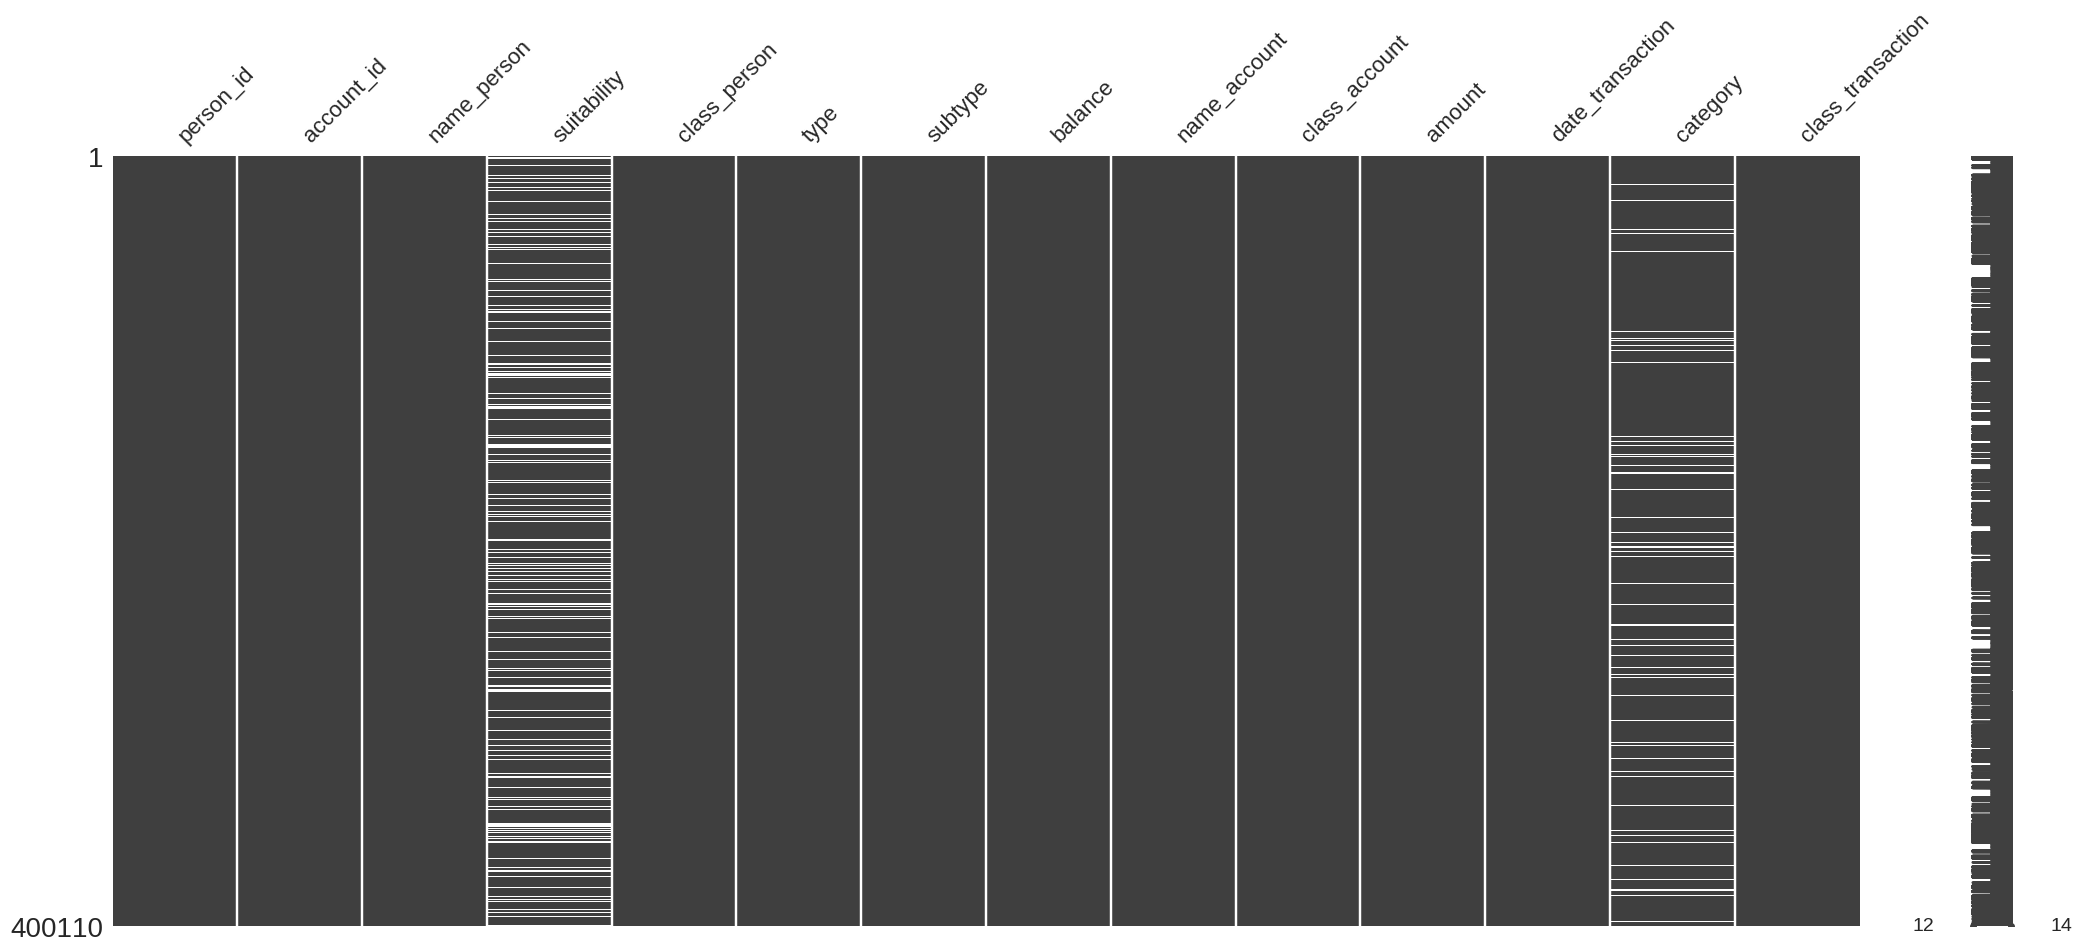

In [41]:
msno.matrix(df3)

###Os dados faltantes são nas colunas categóricas:

- 17.44% na coluna suitability
- 7.90% na coluna category

## 1.5 - Tratar os dados faltantes

- Verificar qual melhor tratamento:
 - Moda, mediana, média...
 - Remover linhas?
 - Remover atributos?
 - Adicionar um novo nome de variável e depois analisar com cluster?

In [42]:
#Mostrar dados faltantes para coluna "suitability" ou "category"
dados_faltantes = df3[df3['suitability'].isna() | df3['category'].isna()]
dados_faltantes.sample(10)

,person_id,account_id,name_person,suitability,class_person,type,subtype,balance,name_account,class_account,amount,date_transaction,category,class_transaction
5972,a14e0321-b6e7-429b-9111-e58cfa190c70,503e4828-4394-44e5-9989-0239a717680a,Sr. Otávio Porto,NaN,Person,CREDIT,CREDIT_CARD,3513.17,Cartão de Crédito,Account,-1335.00,2023-09-12 03:53:33,Moradia,Transactions
44714,d73a4f64-5b59-4983-b87f-dc7dff0c9499,3eb207b9-9091-417e-a218-97ba36c3a5cb,Gustavo Mendes,moderado,Person,BANK,SAVINGS_ACCOUNT,3596.67,Conta Remunerada,Account,-640.24,2023-07-08 10:28:46,NaN,Transactions
294161,70f4a6c5-1507-471d-9940-a397840b779c,4bad9f18-b6a8-4194-985d-1ea6e115c952,Joaquim Moura,NaN,Person,BANK,CHECKING_ACCOUNT,1884.62,Conta Corrente,Account,-531.72,2023-08-13 05:14:40,Moradia,Transactions
323172,6024e024-81c3-4ce1-b72e-8c03b2d8e195,182f121a-4d48-4ed4-87cd-3f188b07cd5f,Dra. Alice Rodrigues,NaN,Person,CREDIT,CREDIT_CARD,3724.10,Cartão de Crédito,Account,3011.56,2023-06-22 06:17:00,Recebido,Transactions
58783,fa084876-37ec-4e5a-9ac2-de9a40279cfe,2bf75379-decf-4648-916c-509b688fb192,Valentina Fernandes,NaN,Person,BANK,CHECKING_ACCOUNT,20833.47,Conta Corrente,Account,-1423.17,2023-07-22 20:32:02,Moradia,Transactions
386054,fb110141-ca4e-4a27-b13a-cb0f941270fa,c84cbe22-f4fd-4481-8fd6-c7c823176d90,João Miguel Freitas,NaN,Person,BANK,CHECKING_ACCOUNT,763.27,Conta Corrente,Account,2546.70,2023-09-10 06:05:57,Recebido,Transactions
310138,95789bdf-9b03-42ab-9e97-1cf5d339ffd2,fc1592f9-0613-401e-b380-be71d74cd4a9,Sr. Arthur Martins,NaN,Person,BANK,CHECKING_ACCOUNT,8942.69,Conta Corrente,Account,-2586.30,2023-06-24 19:03:30,Outras saídas,Transactions
223748,9076e47a-5d05-4fe3-84c9-e428830ea157,b043c8aa-5276-4d4b-961b-56ca78a9b280,Amanda Nascimento,NaN,Person,BANK,SAVINGS_ACCOUNT,6039.83,Caixinha,Account,-484.87,2023-07-11 00:39:58,"Imposto, juros e multa",Transactions
157976,d9c36b44-3c92-4431-8a59-91133bcdc601,2f6a19ea-3339-4a1a-859d-281317292ccf,João Miguel Moreira,NaN,Person,BANK,CHECKING_ACCOUNT,499.80,Conta Corrente,Account,383.35,2023-07-19 03:19:25,Investimento,Transactions
32708,8f5bf6de-7163-467c-92e9-2efec931f390,dcfa54da-0a00-47c0-8788-2ac25b665d01,Luiz Miguel Almeida,NaN,Person,BANK,SAVINGS_ACCOUNT,4937.89,Conta Remunerada,Account,-496.40,2023-07-24 11:43:00,Lazer,Transactions


###Estratégia de tratamento, precisamos entender a correlação entre os atributos.

 - Correlação entre os atributos numéricos.

<ipython-input-43-94f3e8d9a858>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df3.corr()


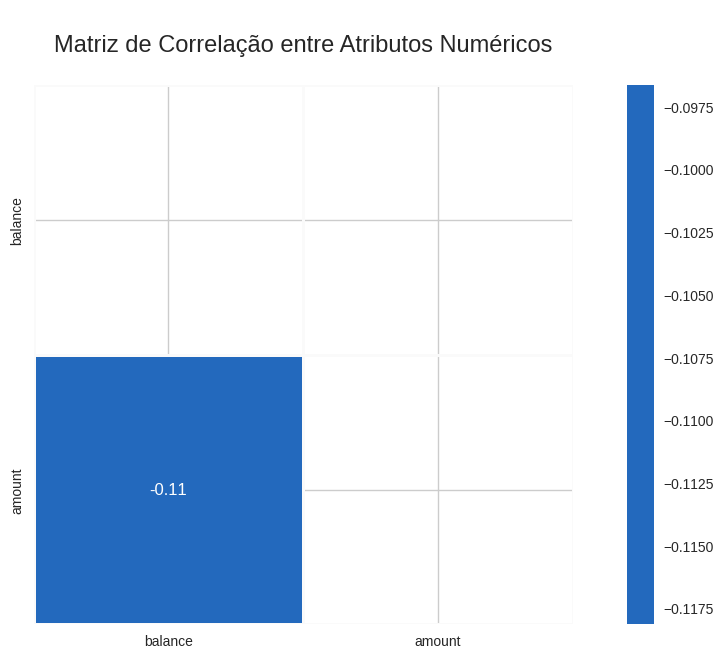

In [43]:
# Plotando a matrix de correlação dos atributos numéricos.
corr_matrix = df3.corr()
mask = np.triu(corr_matrix)

plt.figure(figsize=(14,7))

sns.heatmap(data=corr_matrix, mask=mask, cmap='vlag', linewidths=1, square=True, center=0.0, linecolor='#fafafa', annot=True)
plt.title('\nMatriz de Correlação entre Atributos Numéricos\n', fontsize=17)
plt.show()

### Resumo:
 - A correlação entre os atributos númericos é muito baixa.


# Tratar os dados faltantes com uma nova váriável.

 - suitability: NaN = S/INF (Sem informação);
 - category: NaN = S/INF (Sem informação);


In [44]:
df_suitability = df3['suitability'].fillna("S/INF")
df_suitability

113764          S/INF
113748          S/INF
113747          S/INF
113746          S/INF
113745          S/INF
             ...     
201316    conservador
201315    conservador
201314    conservador
201323    conservador
201301    conservador
Name: suitability, Length: 400110, dtype: object

In [45]:
df_category = df3['category'].fillna("S/INF")
df_category

113764        Moradia
113748    Alimentação
113747          S/INF
113746        Moradia
113745          Lazer
             ...     
201316    Alimentação
201315        Moradia
201314        Compras
201323          Saúde
201301     Transporte
Name: category, Length: 400110, dtype: object

In [46]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400110 entries, 113764 to 201301
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   person_id          400110 non-null  object 
 1   account_id         400110 non-null  object 
 2   name_person        400110 non-null  object 
 3   suitability        330341 non-null  object 
 4   class_person       400110 non-null  object 
 5   type               400110 non-null  object 
 6   subtype            400110 non-null  object 
 7   balance            400110 non-null  float64
 8   name_account       400110 non-null  object 
 9   class_account      400110 non-null  object 
 10  amount             400110 non-null  float64
 11  date_transaction   400110 non-null  object 
 12  category           368501 non-null  object 
 13  class_transaction  400110 non-null  object 
dtypes: float64(2), object(12)
memory usage: 45.8+ MB


In [47]:
print("Valores nulos antes do preenchimento:")
df3.isnull().sum()

Valores nulos antes do preenchimento:


person_id                0
account_id               0
name_person              0
suitability          69769
class_person             0
type                     0
subtype                  0
balance                  0
name_account             0
class_account            0
amount                   0
date_transaction         0
category             31609
class_transaction        0
dtype: int64

In [48]:
# Substitui os valores nulos nas colunas pelas modas calculadas
df3['suitability'].fillna(df_suitability, inplace=True)
df3['category'].fillna(df_category, inplace=True)

print("\nValores nulos após o preenchimento:")
df3.isnull().sum()

<ipython-input-48-48bd111260a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['suitability'].fillna(df_suitability, inplace=True)
<ipython-input-48-48bd111260a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['category'].fillna(df_category, inplace=True)



Valores nulos após o preenchimento:


person_id            0
account_id           0
name_person          0
suitability          0
class_person         0
type                 0
subtype              0
balance              0
name_account         0
class_account        0
amount               0
date_transaction     0
category             0
class_transaction    0
dtype: int64

In [49]:
df3

,person_id,account_id,name_person,suitability,class_person,type,subtype,balance,name_account,class_account,amount,date_transaction,category,class_transaction
113764,8f0445d4-7e18-4925-b913-3943430490b5,73c003be-9ce8-43d1-8db5-ebe9d364da76,Agatha Cardoso,S/INF,Person,BANK,SAVINGS_ACCOUNT,3633.24,Conta Remunerada,Account,-785.74,2023-09-04 08:58:47,Moradia,Transactions
113748,8f0445d4-7e18-4925-b913-3943430490b5,73c003be-9ce8-43d1-8db5-ebe9d364da76,Agatha Cardoso,S/INF,Person,BANK,SAVINGS_ACCOUNT,3633.24,Conta Remunerada,Account,-190.62,2023-07-04 08:35:50,Alimentação,Transactions
113747,8f0445d4-7e18-4925-b913-3943430490b5,73c003be-9ce8-43d1-8db5-ebe9d364da76,Agatha Cardoso,S/INF,Person,BANK,SAVINGS_ACCOUNT,3633.24,Conta Remunerada,Account,-611.50,2023-08-31 16:36:15,S/INF,Transactions
113746,8f0445d4-7e18-4925-b913-3943430490b5,73c003be-9ce8-43d1-8db5-ebe9d364da76,Agatha Cardoso,S/INF,Person,BANK,SAVINGS_ACCOUNT,3633.24,Conta Remunerada,Account,-443.52,2023-08-16 06:28:24,Moradia,Transactions
113745,8f0445d4-7e18-4925-b913-3943430490b5,73c003be-9ce8-43d1-8db5-ebe9d364da76,Agatha Cardoso,S/INF,Person,BANK,SAVINGS_ACCOUNT,3633.24,Conta Remunerada,Account,-117.34,2023-07-10 18:43:10,Lazer,Transactions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201316,8b03eb92-e1cf-4cb8-825f-0ce32a3e762c,f6ab87da-0934-42d7-8084-434c0b439015,Yuri das Neves,conservador,Person,BANK,CHECKING_ACCOUNT,3791.65,Conta Corrente,Account,-541.65,2023-09-07 09:02:08,Alimentação,Transactions
201315,8b03eb92-e1cf-4cb8-825f-0ce32a3e762c,f6ab87da-0934-42d7-8084-434c0b439015,Yuri das Neves,conservador,Person,BANK,CHECKING_ACCOUNT,3791.65,Conta Corrente,Account,-868.44,2023-08-14 12:06:11,Moradia,Transactions
201314,8b03eb92-e1cf-4cb8-825f-0ce32a3e762c,f6ab87da-0934-42d7-8084-434c0b439015,Yuri das Neves,conservador,Person,BANK,CHECKING_ACCOUNT,3791.65,Conta Corrente,Account,-3686.49,2023-07-28 08:12:39,Compras,Transactions
201323,8b03eb92-e1cf-4cb8-825f-0ce32a3e762c,f6ab87da-0934-42d7-8084-434c0b439015,Yuri das Neves,conservador,Person,BANK,CHECKING_ACCOUNT,3791.65,Conta Corrente,Account,-1672.70,2023-09-01 03:45:11,Saúde,Transactions


<Axes: >

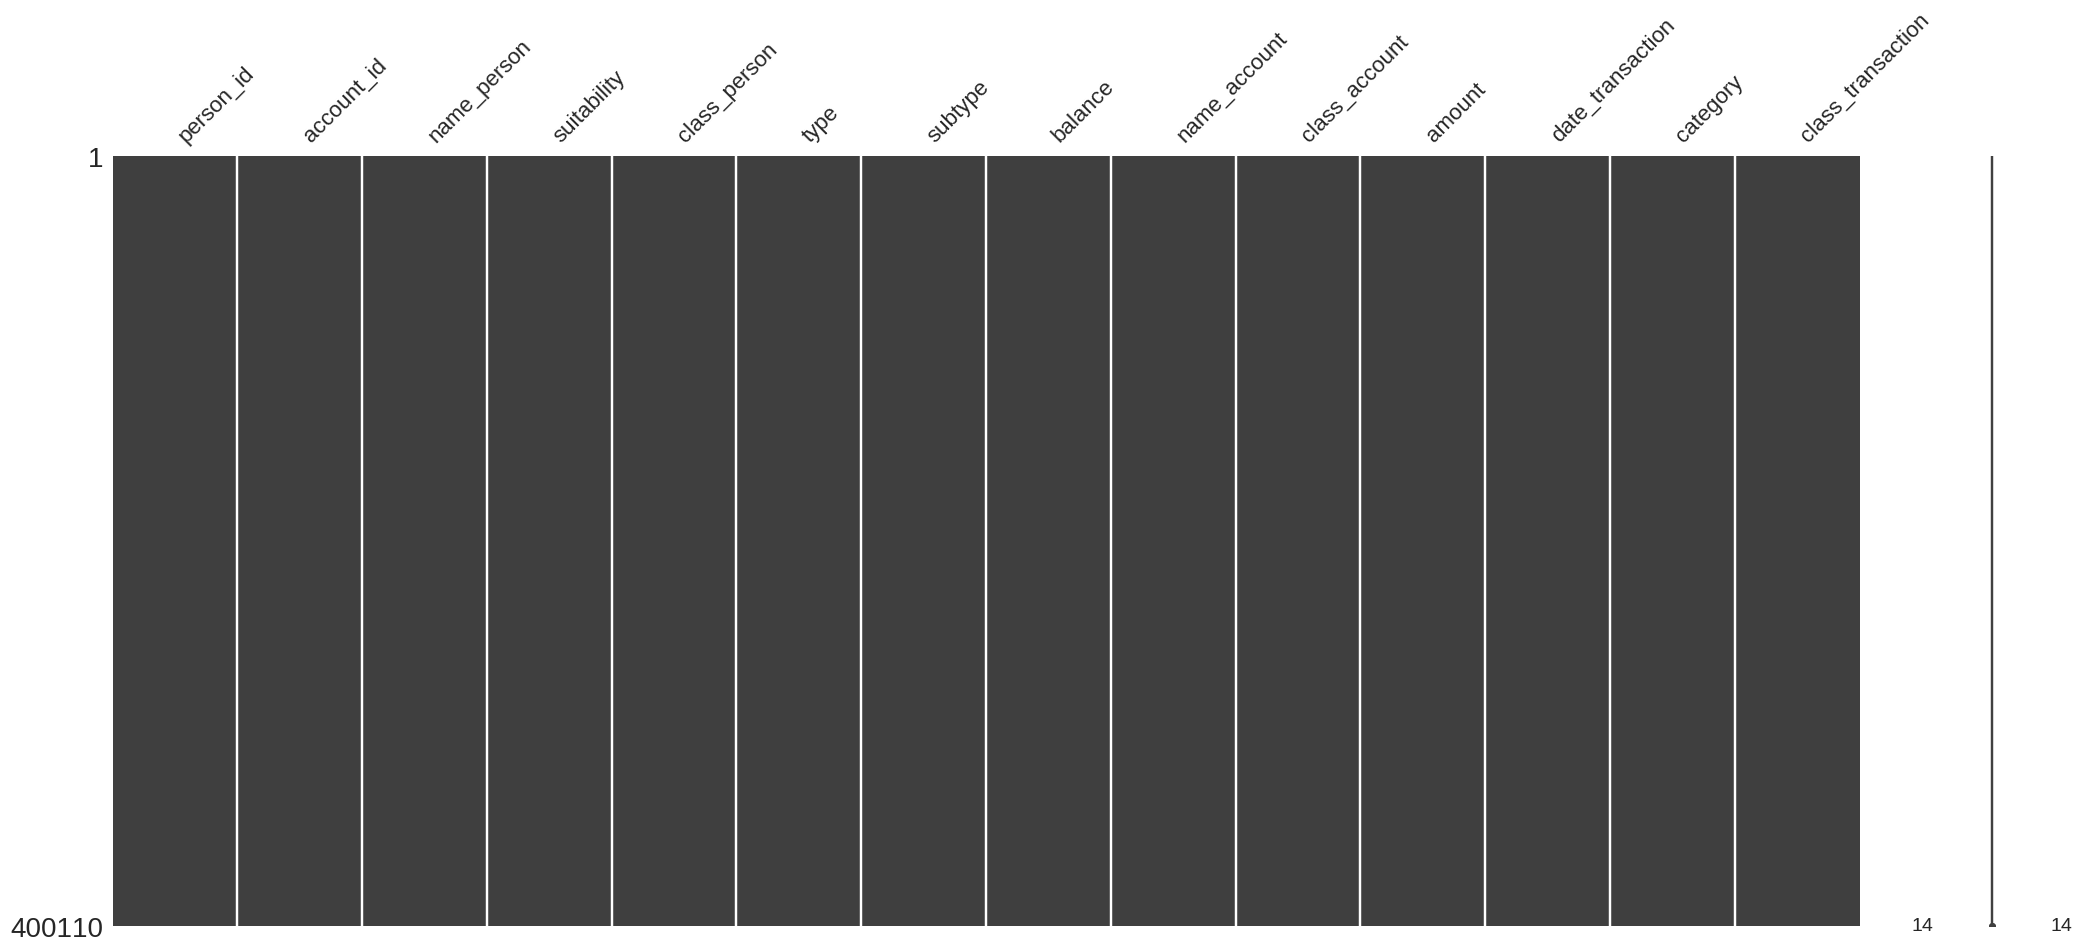

In [50]:
msno.matrix(df3)

## 1.6 - Descrição detalhada dos dados númericos

In [51]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
balance,400110.0,5688.566108,4758.308835,11.52,2540.750,5045.5,7566.56,44965.25
amount,400110.0,-490.874337,2011.405745,-29334.35,-997.315,-328.8,-79.60,17764.30



- OBS: Análise descritiva no código abaixo está mais detalhado e com mais dispersões


In [52]:
num_attributes = df3.select_dtypes( include=['float64', 'int64'])
cat_attributes = df3.select_dtypes( exclude=['float64', 'int64', 'datetime64[ns]'])





















## 1.6.1 - Atributos numéricos




In [53]:
# central tendency
ct1 = pd.DataFrame(num_attributes.apply(np.mean) ).T   # média
ct2 = pd.DataFrame(num_attributes.apply(np.median) ).T  # mediana

# dispersion
d1 = pd.DataFrame(num_attributes.apply(np.std) ).T # Desvio padrão
d2 = pd.DataFrame(num_attributes.apply(min) ).T # valor mínimo
d3 = pd.DataFrame(num_attributes.apply(max) ).T # valor máximo
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min())).T # Variação entre o mínimo e máximo valor
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew())).T #skewness
d6 = pd.DataFrame(num_attributes.apply( lambda x : x.kurtosis())).T # kurtosis

m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['att', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurt']
m

,att,min,max,range,mean,median,std,skew,kurt
0,balance,11.52,44965.25,44953.73,5688.566108,5045.5,4758.302888,2.658396,12.222646
1,amount,-29334.35,17764.30,47098.65,-490.874337,-328.8,2011.403232,-0.741110,17.477113


**IPC: As perguntas de negócio**
1. Realizar uma **análise exploratória profunda dos dados** para **entender as características e padrões de gastos dos clientes.**
2. **Criar uma nova feature** que **identifique se as transações se referem a gastos fixos ou variáveis.**
3. **Utilizar técnicas de clustering(Agrupamento)** para segmentar os clientes em diferentes perfis de gastos. MACHINE LEARNING
4. **Com base na análise exploratória, etiquetar cada cluster identificado com padrões de gastos quanto à quantidade, natureza (fixo/variado) e categoria da compra (como alimentação, saúde, lazer, etc.).**
5. Responder às seguintes perguntas:

   - Quais os perfis de clientes que mais gastam proporcionalmente em gastos fixos?
   - Quais as categorias de compra que mais impactam nos perfis de gasto?
   - Quais são os perfis centrais (ou típicos) de cada cluster?

# **2.0 - Exploratory data analysis (EDA)**

- Criar uma feature para identificar gastos fixos e variáveis;
-  Responder as perguntas de negócios.
   - Quais os perfis de clientes que mais gastam proporcionalmente em gastos fixos?
   - Quais as categorias de compra que mais impactam nos perfis de gasto?
   - Quais são os perfis centrais (ou típicos) de cada cluster?

## Exploração geral das colunas categóricas

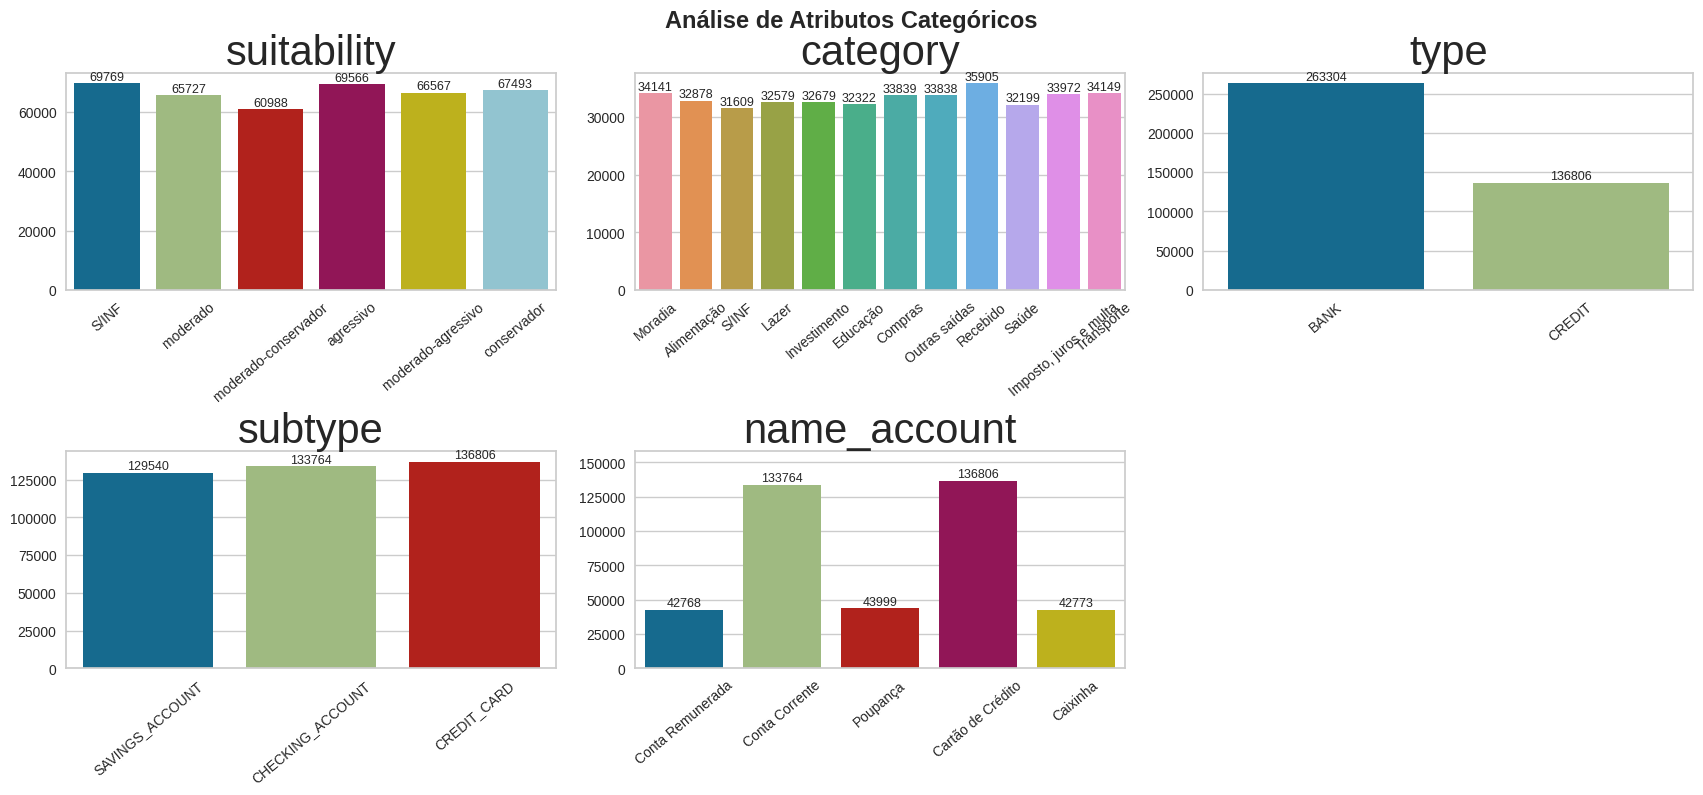

In [54]:
# @title

# Função para gerar countplot
#   df: DataFrame com os dados
#   columns: Lista de colunas categóricas
#   n_cols: número de colunas de subplots

def plot_count(df,columns,n_cols):
    n_rows = (len(columns) - 1) // n_cols + 1
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(17, 4 * n_rows))
    ax = ax.flatten()

    for i, column in enumerate(columns):
        sns.countplot(data=df, x=column, ax=ax[i])

        # Titles
        ax[i].set_title(f'{column}', fontsize= 30)
        ax[i].set_xlabel(None, fontsize=30)
        ax[i].set_ylabel(None, fontsize=80)
        ax[i].tick_params(axis='x', rotation=40)

        for p in ax[i].patches:
            value = int(p.get_height())
            ax[i].annotate(f'{value:.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                           ha='center', va='bottom', fontsize=9)

    ylim_top = ax[i].get_ylim()[1]
    ax[i].set_ylim(top=ylim_top * 1.1)
    for i in range(len(columns), len(ax)):
        ax[i].axis('off')

    fig.suptitle('Análise de Atributos Categóricos', fontsize=17, fontweight='bold')
    plt.tight_layout(pad=0.5)
    plt.show()

plot_count(df3,cat_atrib,3)

###Resumo

 - Ambas as colunas possuem dados faltantes. Porém há uma distribuição entre as variáveis categóricas bem normalizadas;
 - Na coluna suitability tem o perfil "agressivo" com  69.566 investidores e o perfil "moderado-conservador" com 60.988;
 - Na coluna "category" o que mais teve gastos é "Recebido" com 35.905 e a menor quantidade de gasto é "saúde" com 32.199;
 -Como os valores para ambas colunas estão quase homogêneos. Irei substituir os dados faltantes com um nome de variável e depois verificar por meio de clustering qual perfil de cliente é melhor aceito.


## 2.1 - Feature de gastos fixos e variáveis

In [55]:
df3.groupby("suitability").size()

suitability
S/INF                   69769
agressivo               69566
conservador             67493
moderado                65727
moderado-agressivo      66567
moderado-conservador    60988
dtype: int64

In [56]:
df3.groupby("category").size()

category
Alimentação               32878
Compras                   33839
Educação                  32322
Imposto, juros e multa    33972
Investimento              32679
Lazer                     32579
Moradia                   34141
Outras saídas             33838
Recebido                  35905
S/INF                     31609
Saúde                     32199
Transporte                34149
dtype: int64

In [57]:
#Gastos Fixos e Variáveis
df4 = df3.copy()

gastos_fixos = ['Educação', 'Investimento', 'Moradia', 'Saúde' ]
gastos_variaveis = ['Alimentação', 'Compras', 'Imposto,juros e multa', 'Lazer', 'Outras saídas','Recebido', 'S/INF', 'Transporte']

# Função para determinar se a categoria é gasto fixo ou variável
def tipo_de_gasto(categoria):
    if categoria in gastos_fixos:
        return 'Fixo'
    else:
        return 'Variável'

# Aplicar a função à coluna 'category' para criar uma nova coluna chamada 'type_cost'
df4['type_cost'] = df4['category'].apply(tipo_de_gasto)

# Exibir o DataFrame resultante
df4.sample(10)

,person_id,account_id,name_person,suitability,class_person,type,subtype,balance,name_account,class_account,amount,date_transaction,category,class_transaction,type_cost
285284,67bd6c3a-0986-44a2-99bf-4f67514be1b2,23ad4c34-1fba-4835-b0d7-4a938330930d,Mariane Nascimento,moderado-agressivo,Person,BANK,SAVINGS_ACCOUNT,875.90,Poupança,Account,540.61,2023-07-09 07:51:25,Investimento,Transactions,Fixo
38305,8d5242c4-caa2-421d-9dc4-d18fb228991f,974c5be9-746d-4ae6-aaa6-6aea14b531f9,Dr. Pietro Rodrigues,S/INF,Person,BANK,SAVINGS_ACCOUNT,3479.10,Poupança,Account,-1374.23,2023-09-09 02:58:38,S/INF,Transactions,Variável
71698,cb0dfb26-f06f-459f-b0d0-c744b0984267,ad854ddc-d3cc-4f85-8ea6-8c51c04dc028,Luiza Duarte,moderado-conservador,Person,CREDIT,CREDIT_CARD,7290.70,Cartão de Crédito,Account,-724.98,2023-08-16 10:16:28,Moradia,Transactions,Fixo
278209,db3e11b1-12f3-4dc1-a1a2-2cbf2fdc4528,aa82524a-309c-444b-b1f3-0b8070a9270b,Thiago Martins,moderado-agressivo,Person,BANK,SAVINGS_ACCOUNT,8502.30,Caixinha,Account,-93.55,2023-09-06 23:08:36,Alimentação,Transactions,Variável
339636,4f4a315f-69e5-4f73-bd1f-5ee87a6177ac,91e617b4-d27f-4ff3-8be3-27bc4573fac4,Maria Fernanda da Costa,moderado,Person,CREDIT,CREDIT_CARD,826.90,Cartão de Crédito,Account,-466.74,2023-06-29 08:37:27,Saúde,Transactions,Fixo
17537,b820ef16-eb09-4238-b72d-7c3a6b6beb76,8877fc59-646b-479d-8943-24d6ff719051,Alana Ferreira,agressivo,Person,BANK,SAVINGS_ACCOUNT,8735.18,Caixinha,Account,-65.35,2023-07-26 19:00:25,Alimentação,Transactions,Variável
292219,110dd5e3-e365-43de-90cd-1ff648bd6abd,57ea492e-93f1-44be-beb4-3ec895489224,Maysa Souza,conservador,Person,CREDIT,CREDIT_CARD,1528.14,Cartão de Crédito,Account,-184.52,2023-08-16 19:22:53,Lazer,Transactions,Variável
189376,b58cd465-fd3c-475f-bfe1-cbded7a8f967,a81fde05-d865-4165-baea-a8394bd7153f,Carolina Sales,moderado-conservador,Person,BANK,CHECKING_ACCOUNT,1484.90,Conta Corrente,Account,-2356.13,2023-09-06 16:10:27,S/INF,Transactions,Variável
83820,7906e861-1120-4ee1-8127-649b73b729e6,ef8d4b5f-d612-456f-90b1-5f46cc764a03,Vicente da Conceição,S/INF,Person,BANK,CHECKING_ACCOUNT,4321.00,Conta Corrente,Account,-1532.89,2023-06-23 00:39:54,Educação,Transactions,Fixo
172187,e9c6991d-fe22-44b4-8ca1-0baa978619e9,d170a0f7-ad7a-4a27-8ee6-1a2c763fb409,Sra. Rebeca Pinto,moderado-conservador,Person,CREDIT,CREDIT_CARD,1034.24,Cartão de Crédito,Account,-4050.63,2023-08-01 08:36:36,S/INF,Transactions,Variável


In [58]:
#Agrupamento de tipo de custo com a categoria
df4.groupby(['type_cost','category']).agg({'balance':'mean','amount':'mean'})

balance       amount
type_cost category                                        
Fixo      Educação                5693.137477 -1591.441251
          Investimento            5714.177707   974.265999
          Moradia                 5716.045035  -549.429418
          Saúde                   5697.120390  -753.077415
Variável  Alimentação             5624.909529  -149.602496
          Compras                 5696.537910 -2206.417472
          Imposto, juros e multa  5669.975536  -287.856513
          Lazer                   5732.732687  -428.234560
          Outras saídas           5664.580658 -1368.331176
          Recebido                5649.836041  3022.643996
          S/INF                   5688.093949 -2769.826038
          Transporte              5718.863678  -151.093738

In [59]:
#Agrupamento de grupo  type_cost com name_account
df4.groupby(['type_cost','name_account']).agg({'balance':'max','amount':'max'})

balance    amount
type_cost name_account                         
Fixo      Caixinha           37737.30   8832.10
          Cartão de Crédito  44240.16   9318.37
          Conta Corrente     41555.93   9574.92
          Conta Remunerada   44965.25   9151.98
          Poupança           36645.75  10125.83
Variável  Caixinha           37737.30  17195.10
          Cartão de Crédito  44240.16  17764.30
          Conta Corrente     41555.93  17646.35
          Conta Remunerada   44965.25  17733.48
          Poupança           36645.75  17385.53

In [60]:
#Agrupamento de grupo  type_cost com name_account
df4.groupby(['type_cost','name_account']).agg({'balance':'min','amount':'min'})

balance    amount
type_cost name_account                        
Fixo      Caixinha             35.60 -13569.54
          Cartão de Crédito    11.52 -14396.27
          Conta Corrente       13.21 -14113.75
          Conta Remunerada     13.87 -12886.78
          Poupança             12.41 -14373.95
Variável  Caixinha             35.60 -26209.33
          Cartão de Crédito    11.52 -29239.33
          Conta Corrente       13.21 -28302.53
          Conta Remunerada     13.87 -23949.77
          Poupança             12.41 -29334.35

###Resumo:

- Foi dividido por categoria os gastos fixos e variáveis de acordo com as colunas "category", "balance" e "amount";
- Tirei a média de "balance" e "amount" para ter uma base de quanto é gasto em média por cada categoria.

## 2.2 - Quais os perfis de clientes que mais gastam proporcionalmente em gastos fixos?

In [61]:
#Filtrando apenas transações relacionadas a gastos fixos
df_gastos_fixos = df4[df4['type_cost'] == 'Fixo']

In [62]:
#Agregação de grupo de perfil de cliente que mais gastam proporcional aos gastos fixos
df_gastos_fixos.groupby(['type_cost', 'suitability']).agg({'amount':'mean'})

amount
type_cost suitability                     
Fixo      S/INF                -468.193169
          agressivo            -478.323380
          conservador          -497.646977
          moderado             -498.037712
          moderado-agressivo   -444.095985
          moderado-conservador -473.665255

Conclusão:

- o perfil moderado é o que mais tem gastos fixos

##2.3 - Quais as categorias de compra que mais impactam nos perfis de gasto?





In [63]:
# Agrupando por suitability e categoria, calculando a soma total dos gastos
soma_gastos_por_categoria = df4.groupby(['suitability', 'category'])['amount'].sum()

# Reorganizando para facilitar a visualização
soma_gastos_por_categoria = soma_gastos_por_categoria.unstack(level='category')

In [64]:
soma_gastos_por_categoria

category,Alimentação,Compras,Educação,"Imposto, juros e multa",Investimento,Lazer,Moradia,Outras saídas,Recebido,S/INF,Saúde,Transporte
suitability,,,,,,,,,,,,
S/INF,-831766.36,-12953361.74,-8719711.20,-1651183.08,5463582.80,-2444078.02,-3237163.02,-8060477.24,18277551.36,-14758983.33,-4223650.21,-880401.64
agressivo,-832818.59,-13305599.02,-9006477.98,-1723138.51,5624787.74,-2394236.34,-3266855.50,-8002052.75,19563661.45,-15368453.56,-4268228.77,-922950.58
conservador,-850525.40,-12399260.43,-9003499.92,-1701464.54,5509445.68,-2443394.48,-3301013.71,-8001207.73,18723437.59,-15724456.49,-4283549.06,-893885.43
moderado,-869177.97,-12637600.85,-8821557.64,-1604827.55,5290103.81,-2306172.76,-3177610.40,-7979649.41,18216652.14,-14553222.99,-4062495.41,-847771.68
moderado-agressivo,-780408.90,-11514265.52,-8013978.99,-1492264.86,4994265.11,-2220228.85,-2885187.16,-7056534.49,17073361.42,-13694379.51,-3809254.54,-791800.77
moderado-conservador,-753933.63,-11852873.29,-7873338.40,-1606182.93,4955853.43,-2143343.29,-2890239.97,-7201668.71,16673368.71,-13451935.34,-3601161.69,-822889.96


In [65]:
#Agregação de grupo tipo de custo com a categoria e perfil de cliente
df4.groupby(['type_cost','suitability','category']).agg({'amount':'sum'})

amount
type_cost suitability          category                  
Fixo      S/INF                Educação       -8719711.20
                               Investimento    5463582.80
                               Moradia        -3237163.02
                               Saúde          -4223650.21
          agressivo            Educação       -9006477.98
...                                                   ...
Variável  moderado-conservador Lazer          -2143343.29
                               Outras saídas  -7201668.71
                               Recebido       16673368.71
                               S/INF         -13451935.34
                               Transporte      -822889.96

[72 rows x 1 columns]

Conclusão:

- A categoria que mais impacta no gasto fixo é Educação	com quantidade de R$9.006.477,98 de reais;

- A categoria que mais impacta no gasto variável é "Recebido"	com quantidade de R$16.673.368,71 de reais;


# **3.0 - Machine Learning: Clustering**


3. **Utilizar técnicas de clustering(Agrupamento)** para segmentar os clientes em diferentes perfis de gastos. MACHINE LEARNING
4. **Com base na análise exploratória, etiquetar cada cluster identificado com padrões de gastos quanto à quantidade, natureza (fixo/variado) e categoria da compra (como alimentação, saúde, lazer, etc.).**

##3.1 - Quais são os perfis centrais (ou típicos) de cada cluster?

##Visualizar base para clusterização

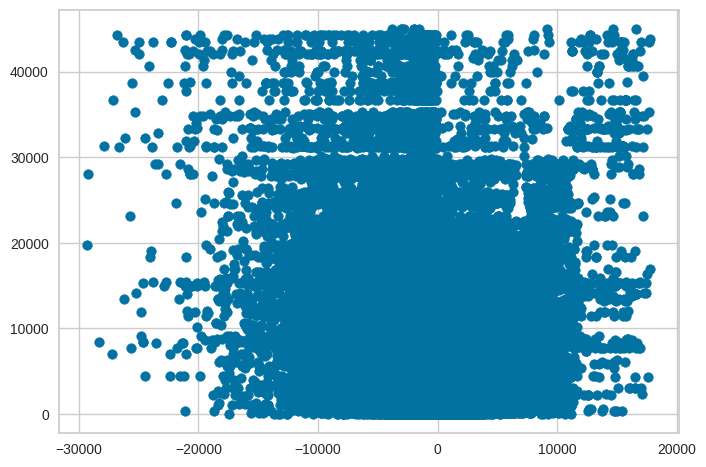

In [66]:
plt.scatter(x=df4['amount'], y=df4['balance'])
plt.show()

##Rodar o Kmeans

In [67]:
# Selecionando colunas relevantes para o clustering
cols_for_clustering = ['balance', 'amount']
X = df4[cols_for_clustering]

# Escolhendo o número de clusters (você pode ajustar conforme necessário)
n_clusters = 5

# Aplicando o algoritmo de clustering (K-Means)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df4['cluster'] = kmeans.fit_predict(X)

# Calculando os centros dos clusters
centros_clusters = pd.DataFrame(kmeans.cluster_centers_, columns=cols_for_clustering)

# Exibindo os centros dos clusters
print(centros_clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        balance       amount
0  15569.309844 -1415.003575
1   4764.823133  -451.191492
2  30382.895367 -2019.633644
3   7984.281958  -391.889888
4   1595.011253  -395.391693


In [68]:
# Grupos de cada registro da base
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 0], dtype=int32)

In [69]:
# Juntar a base com os respectivos labels
df_clusters = df4.copy()
df_clusters['cluster'] = kmeans.labels_
df_clusters.tail()

,person_id,account_id,name_person,suitability,class_person,type,subtype,balance,name_account,class_account,amount,date_transaction,category,class_transaction,type_cost,cluster
201316,8b03eb92-e1cf-4cb8-825f-0ce32a3e762c,f6ab87da-0934-42d7-8084-434c0b439015,Yuri das Neves,conservador,Person,BANK,CHECKING_ACCOUNT,3791.65,Conta Corrente,Account,-541.65,2023-09-07 09:02:08,Alimentação,Transactions,Variável,1
201315,8b03eb92-e1cf-4cb8-825f-0ce32a3e762c,f6ab87da-0934-42d7-8084-434c0b439015,Yuri das Neves,conservador,Person,BANK,CHECKING_ACCOUNT,3791.65,Conta Corrente,Account,-868.44,2023-08-14 12:06:11,Moradia,Transactions,Fixo,1
201314,8b03eb92-e1cf-4cb8-825f-0ce32a3e762c,f6ab87da-0934-42d7-8084-434c0b439015,Yuri das Neves,conservador,Person,BANK,CHECKING_ACCOUNT,3791.65,Conta Corrente,Account,-3686.49,2023-07-28 08:12:39,Compras,Transactions,Variável,1
201323,8b03eb92-e1cf-4cb8-825f-0ce32a3e762c,f6ab87da-0934-42d7-8084-434c0b439015,Yuri das Neves,conservador,Person,BANK,CHECKING_ACCOUNT,3791.65,Conta Corrente,Account,-1672.70,2023-09-01 03:45:11,Saúde,Transactions,Fixo,1
201301,8b03eb92-e1cf-4cb8-825f-0ce32a3e762c,5e5f6c14-3f3f-4a9c-bf33-7e0cb2f0a656,Yuri das Neves,conservador,Person,BANK,CHECKING_ACCOUNT,16530.15,Conta Corrente,Account,-572.95,2023-06-21 13:50:18,Transporte,Transactions,Variável,0


In [70]:
# salva em um csv
df_clusters.to_csv('agrupamento.csv', index=False)

In [71]:
# Número de registros em cada cluster
df_clusters.cluster.value_counts()

4    126030
1    125359
3    120891
0     22510
2      5320
Name: cluster, dtype: int64

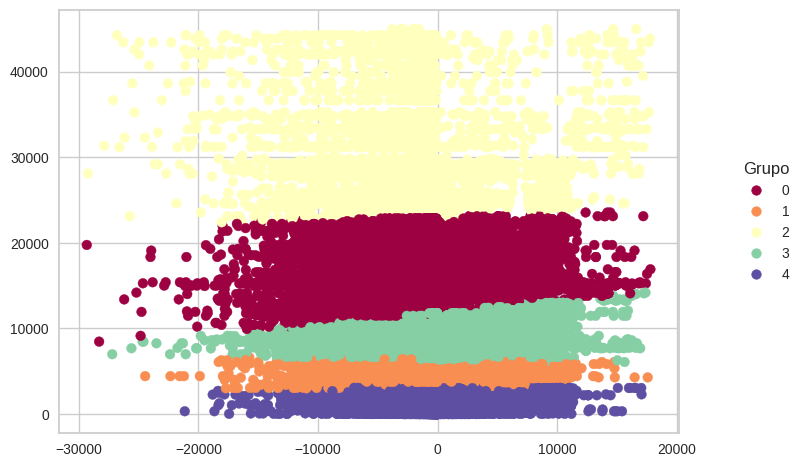

In [72]:
# Gráfico da separação dos grupos formados
fig =plt.scatter(x=df_clusters['amount'], y=df_clusters['balance'], c=kmeans.labels_, cmap='Spectral')
handles, labels = fig.legend_elements(prop="colors")
plt.legend(handles, labels, loc='center right', bbox_to_anchor=(1.2, 0.5), title='Grupo')
plt.show()

Conclusão:

- Há 5 tipos de grupo que é de acordo com a quantidade de gastos no (eixo X - Amount) e o saldo recebido (eixo y - Balance);
- A quantidade outlines para o grupo 2 é bastante alta comparado aos demais grupos;
- O grupo 2 é o que mais tem de saldo.

##3.2 - Com base na análise exploratória, etiquetar cada cluster identificado com padrões de gastos quanto à quantidade, natureza (fixo/variado) e categoria da compra (como alimentação, saúde, lazer, etc.).

In [73]:
# Definindo rótulos com base na análise exploratória
rotulos_clusters = {
    0: 'Perfil Conservador',
    1: 'Perfil Moderado',
    2: 'Perfil Moderado-conservador',
    3: 'Perfil Moderado-agressivo',
    4: 'Perfil Agressivo'
}

# Adicionando coluna de rótulos ao DataFrame
df4['rotulo_cluster'] = df_clusters['cluster'].map(rotulos_clusters)


# Exibindo o DataFrame com os rótulos dos clusters
print(df4[['cluster', 'rotulo_cluster', 'balance', 'amount', 'type_cost', 'category']])

        cluster      rotulo_cluster   balance   amount type_cost     category
113764        1     Perfil Moderado   3633.24  -785.74      Fixo      Moradia
113748        1     Perfil Moderado   3633.24  -190.62  Variável  Alimentação
113747        1     Perfil Moderado   3633.24  -611.50  Variável        S/INF
113746        1     Perfil Moderado   3633.24  -443.52      Fixo      Moradia
113745        1     Perfil Moderado   3633.24  -117.34  Variável        Lazer
...         ...                 ...       ...      ...       ...          ...
201316        1     Perfil Moderado   3791.65  -541.65  Variável  Alimentação
201315        1     Perfil Moderado   3791.65  -868.44      Fixo      Moradia
201314        1     Perfil Moderado   3791.65 -3686.49  Variável      Compras
201323        1     Perfil Moderado   3791.65 -1672.70      Fixo        Saúde
201301        0  Perfil Conservador  16530.15  -572.95  Variável   Transporte

[400110 rows x 6 columns]


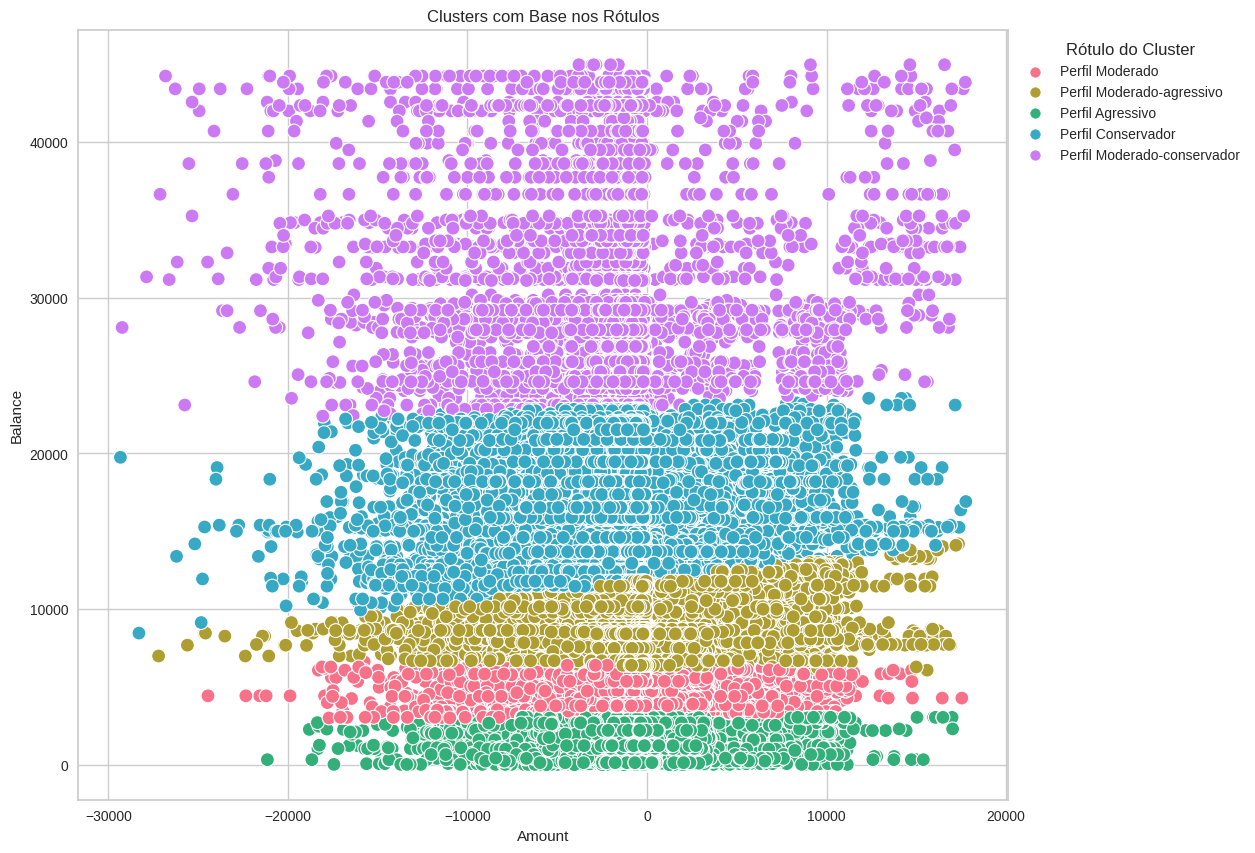

In [74]:
# Adicionando coluna de rótulos ao DataFrame
df4['rotulo_cluster'] = df4['cluster'].map(rotulos_clusters)


# Especificando uma paleta de cores personalizada
cores_personalizadas = sns.color_palette("husl", n_clusters)

# Criando um gráfico de dispersão
plt.figure(figsize=(12, 10))
scatter = sns.scatterplot(x='amount', y='balance', hue='rotulo_cluster', data=df4,  palette=cores_personalizadas, s=100)

# Expandindo a legenda
scatter.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Rótulo do Cluster')

# Adicionando rótulos e título
plt.xlabel('Amount')
plt.ylabel('Balance')
plt.title('Clusters com Base nos Rótulos')

# Exibindo o gráfico
plt.show()

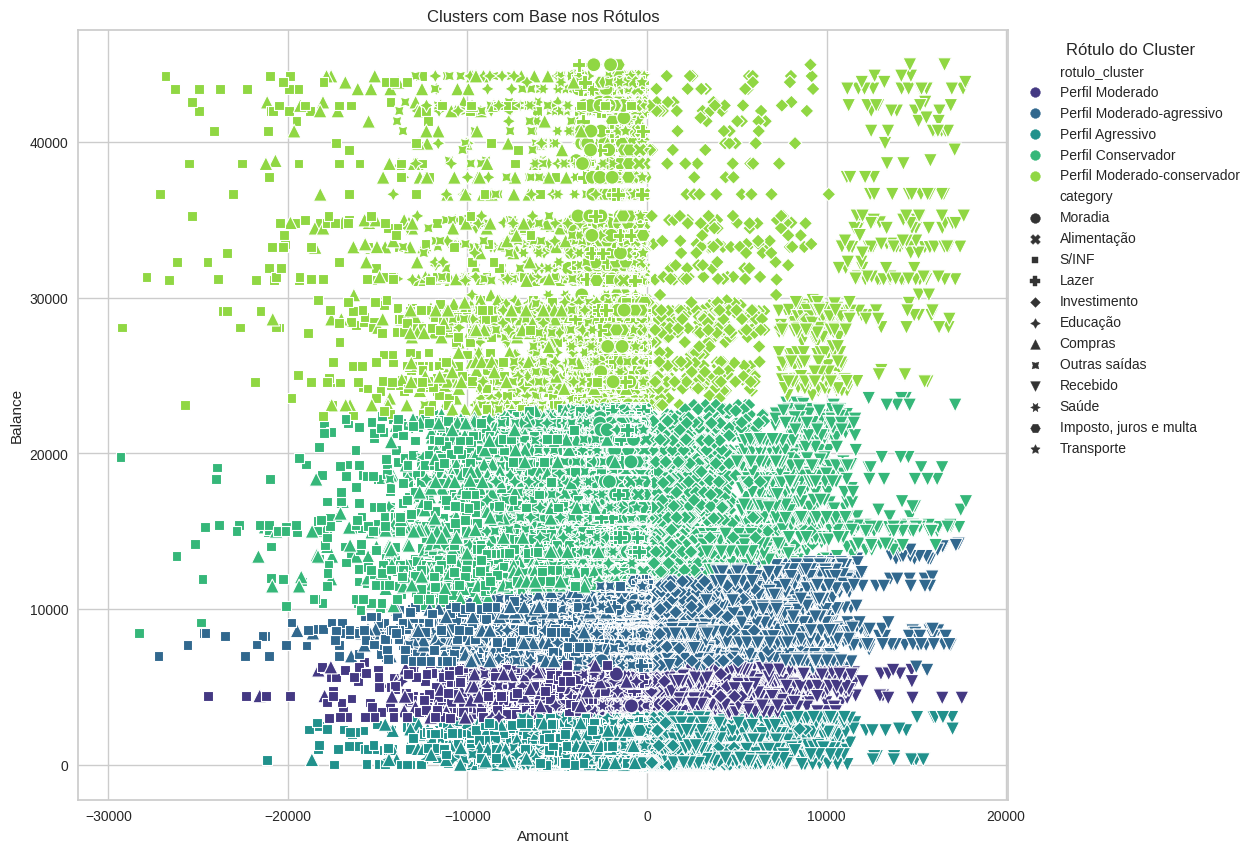

In [75]:
# Adicionando coluna de rótulos ao DataFrame
df4['rotulo_cluster'] = df4['cluster'].map(rotulos_clusters)


# Especificando uma paleta de cores personalizada
cores_personalizadas = sns.color_palette("husl", n_clusters)

# Criando um gráfico de dispersão
plt.figure(figsize=(12, 10))
scatter = sns.scatterplot(x='amount', y='balance', hue='rotulo_cluster', style='category', data=df4, palette='viridis', markers=True, s=100)

# Expandindo a legenda
scatter.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Rótulo do Cluster')

# Adicionando rótulos e título
plt.xlabel('Amount')
plt.ylabel('Balance')
plt.title('Clusters com Base nos Rótulos')

# Exibindo o gráfico
plt.show()

Conclusão:

- Os perfis com menos saldo são mais agressivos no investimento;
- O perfil moderado-conservador é que mais tem saldo. Logo, poderia sugerir a esse perfil novos investimentos com um rendimento rentável e com mais uma margem boa de segurança.
- O perfil mais Agressivo poderia apresentar cursos que possam ajudar a esse perfil ter mais aumento da renda, e assim, variar nos tipos de investimentos.

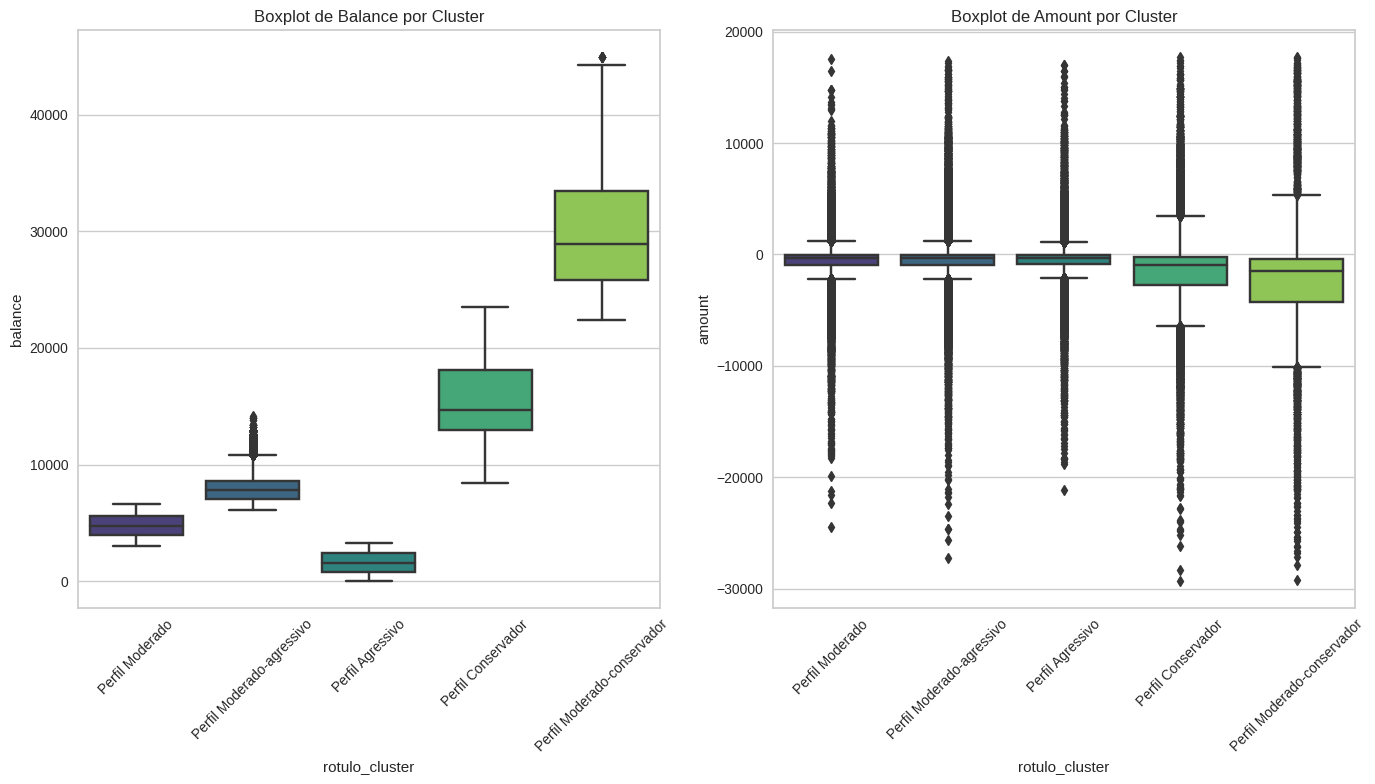

In [76]:
# Adicionando coluna de rótulos ao DataFrame
df4['rotulo_cluster'] = df4['cluster'].map(rotulos_clusters)

# Criando boxplots para 'balance' e 'amount' em relação aos rótulos dos clusters
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='rotulo_cluster', y='balance', data=df4, palette='viridis')
plt.title('Boxplot de Balance por Cluster')
plt.xticks(rotation=45)  # Rotacionando as legendas para melhor legibilidade

plt.subplot(1, 2, 2)
sns.boxplot(x='rotulo_cluster', y='amount', data=df4, palette='viridis')
plt.title('Boxplot de Amount por Cluster')
plt.xticks(rotation=45)  # Rotacionando as legendas para melhor legibilidade

plt.tight_layout()
plt.show()

Conclusão:

- O perfil Moderado-agressivo tem bastante outlines no atributo balance;
- Na tabela Amount há muitos outlines. Sugestivo de perfis estratégicos para ua futura análise.